<a href="https://colab.research.google.com/github/Domsabianca16/ProiectTechTreck/blob/main/ProjectTechTreck.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving idenprof-jpg.zip to idenprof-jpg.zip


In [ ]:
!unzip idenprof-jpg.zip -d idenprof

import os

print(os.listdir('idenprof'))

Streaming output truncated to the last 5000 lines.
  inflating: idenprof/idenprof/train/firefighter/firefighter-470.jpg  
  inflating: idenprof/idenprof/train/firefighter/firefighter-471.jpg  
  inflating: idenprof/idenprof/train/firefighter/firefighter-472.jpg  
  inflating: idenprof/idenprof/train/firefighter/firefighter-473.jpg  
  inflating: idenprof/idenprof/train/firefighter/firefighter-474.jpg  
  inflating: idenprof/idenprof/train/firefighter/firefighter-475.jpg  
  inflating: idenprof/idenprof/train/firefighter/firefighter-476.jpg  
  inflating: idenprof/idenprof/train/firefighter/firefighter-477.jpg  
  inflating: idenprof/idenprof/train/firefighter/firefighter-478.jpg  
  inflating: idenprof/idenprof/train/firefighter/firefighter-479.jpg  
  inflating: idenprof/idenprof/train/firefighter/firefighter-48.jpg  
  inflating: idenprof/idenprof/train/firefighter/firefighter-480.jpg  
  inflating: idenprof/idenprof/train/firefighter/firefighter-481.jpg  
  inflating: idenprof/idenp

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
image_size = (224, 224)
batch_size = 8

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
        'idenprof/idenprof/train',
        target_size=image_size,
        batch_size=batch_size,
        class_mode='categorical',
        subset = 'training',
        shuffle = True)

validation_generator = train_datagen.flow_from_directory(
        'idenprof/idenprof/train',
        target_size=image_size,
        batch_size=batch_size,
        class_mode='categorical',
        subset = 'validation',
        shuffle = False)

Found 7200 images belonging to 10 classes.
Found 1800 images belonging to 10 classes.


In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models, optimizers

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

model = models.Sequential([base_model,
                           layers.GlobalAveragePooling2D(),
                           layers.Dense(128, activation='relu'),
                           layers.Dropout(0.3),
                           layers.Dense(train_generator.num_classes,activation='softmax')
                           ])
optimizer = optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_generator, validation_data=validation_generator, epochs=50)

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
900/900 ━━━━━━━━━━━━━━━━━━━━ 445s 487ms/step - accuracy: 0.3524 - loss: 2.1746 - val_accuracy: 0.6333 - val_loss: 1.1109
Epoch 2/50
900/900 ━━━━━━━━━━━━━━━━━━━━ 499s 554ms/step - accuracy: 0.4851 - loss: 1.4018 - val_accuracy: 0.6444 - val_loss: 1.0066
Epoch 3/50
900/900 ━━━━━━━━━━━━━━━━━━━━ 490s 545ms/step - accuracy: 0.5417 - loss: 1.3020 - val_accuracy: 0.6511 - val_loss: 0.9697
Epoch 4/50
900/900 ━━━━━━━━━━━━━━━━━━━━ 435s 483ms/step - accuracy: 0.5490 - loss: 1.2759 - val_accuracy: 0.6933 - val_loss: 0.9653
Epoch 5/50
900/900 ━━━━━━━━━━━━━━━━━━━━ 432s 480ms/step - accuracy: 0.5609 - loss: 1.2833 - val_accuracy: 0.6633 - val_loss: 1.0877
Epoch 6/50
900/900 ━━━━━━━━━━━━━━━━━━━━ 489s 543ms/step - accuracy: 0.5413 - loss: 1.3048 - val_accuracy: 0.6583 - val_loss: 1.0304
Epoch 7/50
900/900 ━━━━━━━━━━━━━━━━━━━━ 436s 485ms/step - accuracy: 0.5804 - loss: 1.1966 - val_accuracy: 0.6600 - val_loss: 1.0035
Epoch 8/50
900/900 ━━━━━━━━━━━━━━━━━━━━ 442s 491ms/step - accuracy: 0.5553 -

In [ ]:
model.save("idenprof_model_50epochs.h5")

In [ ]:
from google.colab import files
files.download("idenprof_model_50epochs.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import matplotlib.pyplot as plt
# Accuracy plot
plt.plot(history.history['accuracy'], label = 'Train Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.grid(True)
plt.show()
# Loss plot
plt.plot(history.history['loss'], label = 'Train Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.grid(True)
plt.show()

NameError: name 'history' is not defined

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, regularizers
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import json

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    layers.Dropout(0.5), # am crescut dropout ca sa reduc overfitting (fortez modelul sa invete mai generalizat, nu sa memoreze)
    layers.Dense(train_generator.num_classes, activation='softmax')
])

optimizer = optimizers.Adam(learning_rate=0.001) # pun 0.001 standard pt a imbunatatii
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True) # patience = 5 => se opreste cand trec prin a 6 a epoca fara a se imbunatatii
checkpoint = ModelCheckpoint('best_model_50epochs.h5', monitor = 'val_loss' ,save_best_only=True)
callbacks = [early_stop, checkpoint, tf.keras.callbacks.BackupAndRestore(backup_dir='/content/backup')]

history = model.fit(train_generator, validation_data=validation_generator, epochs=50, callbacks=[early_stop, checkpoint])

with open('history_50epochs.json', 'w') as f:
    json.dump(history.history, f)

from google.colab import files
files.download("history_50epochs.json")

files.download('best_model_50epochs.h5')






/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
900/900 ━━━━━━━━━━━━━━━━━━━━ 0s 374ms/step - accuracy: 0.5120 - loss: 2.8201

900/900 ━━━━━━━━━━━━━━━━━━━━ 427s 468ms/step - accuracy: 0.5121 - loss: 2.8193 - val_accuracy: 0.7883 - val_loss: 1.1013
Epoch 2/50
900/900 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step - accuracy: 0.7258 - loss: 1.2327

900/900 ━━━━━━━━━━━━━━━━━━━━ 418s 464ms/step - accuracy: 0.7258 - loss: 1.2326 - val_accuracy: 0.8183 - val_loss: 0.9360
Epoch 3/50
900/900 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step - accuracy: 0.7419 - loss: 1.1370

900/900 ━━━━━━━━━━━━━━━━━━━━ 420s 466ms/step - accuracy: 0.7419 - loss: 1.1370 - val_accuracy: 0.8156 - val_loss: 0.8998
Epoch 4/50
900/900 ━━━━━━━━━━━━━━━━━━━━ 436s 460ms/step - accuracy: 0.7438 - loss: 1.1180 - val_accuracy: 0.8056 - val_loss: 0.9257
Epoch 5/50
900/900 ━━━━━━━━━━━━━━━━━━━━ 413s 459ms/step - accuracy: 0.7488 - loss: 1.1045 - val_accuracy: 0.7967 - val_loss: 0.9274
Epoch 6/50
900/900 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step - accuracy: 0.7221 - loss: 1.1220

900/900 ━━━━━━━━━━━━━━━━━━━━ 416s 462ms/step - accuracy: 0.7221 - loss: 1.1221 - val_accuracy: 0.8067 - val_loss: 0.8791
Epoch 7/50
900/900 ━━━━━━━━━━━━━━━━━━━━ 411s 457ms/step - accuracy: 0.7353 - loss: 1.0919 - val_accuracy: 0.8106 - val_loss: 0.9012
Epoch 8/50
900/900 ━━━━━━━━━━━━━━━━━━━━ 0s 365ms/step - accuracy: 0.7423 - loss: 1.1040

900/900 ━━━━━━━━━━━━━━━━━━━━ 410s 456ms/step - accuracy: 0.7423 - loss: 1.1040 - val_accuracy: 0.8244 - val_loss: 0.8554
Epoch 9/50
900/900 ━━━━━━━━━━━━━━━━━━━━ 409s 455ms/step - accuracy: 0.7273 - loss: 1.0968 - val_accuracy: 0.7778 - val_loss: 0.9381
Epoch 10/50
900/900 ━━━━━━━━━━━━━━━━━━━━ 414s 460ms/step - accuracy: 0.7479 - loss: 1.0749 - val_accuracy: 0.8106 - val_loss: 0.9097
Epoch 11/50
900/900 ━━━━━━━━━━━━━━━━━━━━ 414s 460ms/step - accuracy: 0.7521 - loss: 1.0781 - val_accuracy: 0.7678 - val_loss: 0.9889
Epoch 12/50
900/900 ━━━━━━━━━━━━━━━━━━━━ 412s 458ms/step - accuracy: 0.7423 - loss: 1.0945 - val_accuracy: 0.8200 - val_loss: 0.8891
Epoch 13/50
900/900 ━━━━━━━━━━━━━━━━━━━━ 414s 460ms/step - accuracy: 0.7273 - loss: 1.1094 - val_accuracy: 0.7944 - val_loss: 0.8965
Epoch 14/50
900/900 ━━━━━━━━━━━━━━━━━━━━ 415s 462ms/step - accuracy: 0.7304 - loss: 1.1193 - val_accuracy: 0.7822 - val_loss: 0.9521
Epoch 15/50
900/900 ━━━━━━━━━━━━━━━━━━━━ 418s 464ms/step - accuracy: 0.7350 - loss

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam

model = tf.keras.models.load_model('best_model_50epochs.h5')

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

history1 = model.fit(train_generator,
                    validation_data=validation_generator,
                    epochs=50,
                    initial_epoch=18,
                    callbacks=[early_stop, checkpoint])

with open('history_continue_epoch18.json', 'w') as f:
    json.dump(history1.history, f)

model.save("idenprof_model_after_18epochs.h5")


Epoch 19/50
900/900 ━━━━━━━━━━━━━━━━━━━━ 435s 476ms/step - accuracy: 0.7362 - loss: 1.0858 - val_accuracy: 0.8033 - val_loss: 0.8890
Epoch 20/50
900/900 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step - accuracy: 0.7332 - loss: 1.0909

900/900 ━━━━━━━━━━━━━━━━━━━━ 418s 464ms/step - accuracy: 0.7332 - loss: 1.0910 - val_accuracy: 0.8317 - val_loss: 0.8485
Epoch 21/50
900/900 ━━━━━━━━━━━━━━━━━━━━ 503s 532ms/step - accuracy: 0.7369 - loss: 1.0941 - val_accuracy: 0.7878 - val_loss: 0.9727
Epoch 22/50
900/900 ━━━━━━━━━━━━━━━━━━━━ 479s 532ms/step - accuracy: 0.7294 - loss: 1.1180 - val_accuracy: 0.7900 - val_loss: 0.9603
Epoch 23/50
900/900 ━━━━━━━━━━━━━━━━━━━━ 437s 460ms/step - accuracy: 0.7157 - loss: 1.1304 - val_accuracy: 0.8094 - val_loss: 0.8869
Epoch 24/50
900/900 ━━━━━━━━━━━━━━━━━━━━ 415s 461ms/step - accuracy: 0.7420 - loss: 1.0675 - val_accuracy: 0.7867 - val_loss: 0.9220
Epoch 25/50
900/900 ━━━━━━━━━━━━━━━━━━━━ 440s 459ms/step - accuracy: 0.7282 - loss: 1.1159 - val_accuracy: 0.7894 - val_loss: 0.9627
Epoch 26/50
900/900 ━━━━━━━━━━━━━━━━━━━━ 444s 461ms/step - accuracy: 0.7414 - loss: 1.0709 - val_accuracy: 0.8089 - val_loss: 0.8989
Epoch 27/50
900/900 ━━━━━━━━━━━━━━━━━━━━ 417s 464ms/step - accuracy: 0.7325 - los

900/900 ━━━━━━━━━━━━━━━━━━━━ 415s 461ms/step - accuracy: 0.7260 - loss: 1.1073 - val_accuracy: 0.8078 - val_loss: 0.8460
Epoch 29/50
900/900 ━━━━━━━━━━━━━━━━━━━━ 416s 463ms/step - accuracy: 0.7237 - loss: 1.1149 - val_accuracy: 0.8128 - val_loss: 0.8829
Epoch 30/50
900/900 ━━━━━━━━━━━━━━━━━━━━ 415s 462ms/step - accuracy: 0.7245 - loss: 1.1094 - val_accuracy: 0.7989 - val_loss: 0.8948
Epoch 31/50
900/900 ━━━━━━━━━━━━━━━━━━━━ 411s 457ms/step - accuracy: 0.7238 - loss: 1.1167 - val_accuracy: 0.7867 - val_loss: 0.9184
Epoch 32/50
900/900 ━━━━━━━━━━━━━━━━━━━━ 413s 459ms/step - accuracy: 0.7356 - loss: 1.1077 - val_accuracy: 0.7833 - val_loss: 0.9104
Epoch 33/50
524/900 ━━━━━━━━━━━━━━━━━━━━ 2:18 369ms/step - accuracy: 0.7245 - loss: 1.0977

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from google.colab import files
import json

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

history2 = model.fit(train_generator,
                    validation_data=validation_generator,
                    epochs=50,
                    initial_epoch=34,
                    callbacks=[early_stop, checkpoint])



with open('history_continue_epoch32.json', 'w') as f:
    json.dump(history2.history, f)

model.save("idenprof_model_after_32epochs.h5")

In [ ]:
import matplotlib.pyplot as plt
# Accuracy plot
plt.plot(history1.history['accuracy'], label = 'Train Accuracy')
plt.plot(history1.history['val_accuracy'], label = 'Validation Accuracy')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.grid(True)
plt.show()
# Loss plot
plt.plot(history1.history['loss'], label = 'Train Loss')
plt.plot(history1.history['val_loss'], label = 'Validation Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.grid(True)
plt.show()



NameError: name 'history1' is not defined

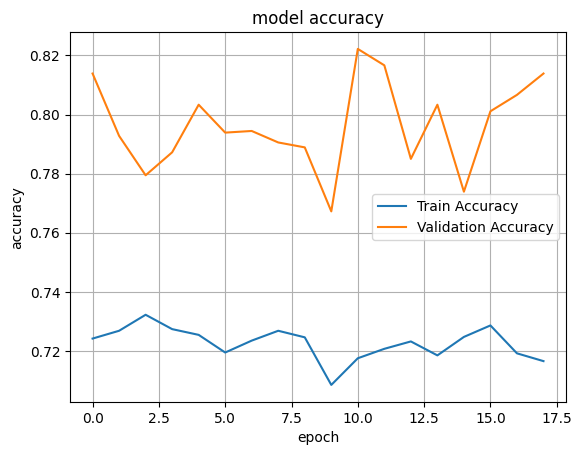

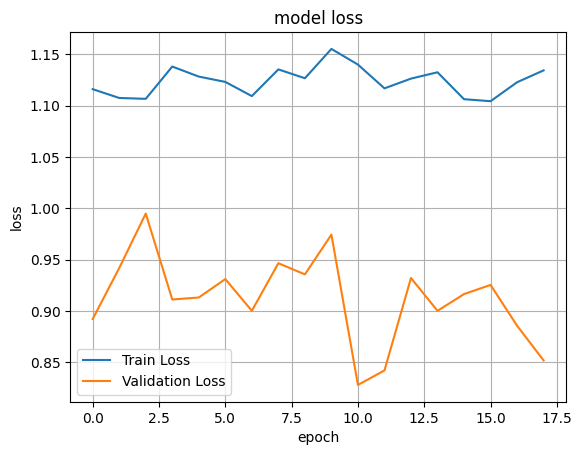

In [ ]:
import matplotlib.pyplot as plt
# Accuracy plot
plt.plot(history2.history['accuracy'], label = 'Train Accuracy')
plt.plot(history2.history['val_accuracy'], label = 'Validation Accuracy')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.grid(True)
plt.show()
# Loss plot
plt.plot(history2.history['loss'], label = 'Train Loss')
plt.plot(history2.history['val_loss'], label = 'Validation Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#Reincercare cu batch 16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
image_size = (224, 224)
batch_size = 16

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
        'idenprof/idenprof/train',
        target_size=image_size,
        batch_size=batch_size,
        class_mode='categorical'
        )

validation_generator = train_datagen.flow_from_directory(
        'idenprof/idenprof/train',
        target_size=image_size,
        batch_size=batch_size,
        class_mode='categorical',
        )


Found 9000 images belonging to 10 classes.
Found 9000 images belonging to 10 classes.


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(train_generator.num_classes, activation='softmax')
])

optimizer = Adam(learning_rate=0.002)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model_10epochs.h5', monitor = 'val_loss' ,save_best_only=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, min_lr=1e-5)

history3 = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10,
    callbacks=[early_stop, checkpoint, reduce_lr]
)

model.save("idenprof_model_10epochs.h5")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.3534 - loss: 2.1419

563/563 ━━━━━━━━━━━━━━━━━━━━ 2145s 4s/step - accuracy: 0.3535 - loss: 2.1413 - val_accuracy: 0.5117 - val_loss: 1.4061 - learning_rate: 0.0020
Epoch 2/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 2154s 4s/step - accuracy: 0.5390 - loss: 1.3224 - val_accuracy: 0.4499 - val_loss: 1.7369 - learning_rate: 0.0020
Epoch 3/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.6601 - loss: 1.0020

563/563 ━━━━━━━━━━━━━━━━━━━━ 2167s 4s/step - accuracy: 0.6601 - loss: 1.0020 - val_accuracy: 0.7218 - val_loss: 0.8608 - learning_rate: 0.0020
Epoch 4/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.7669 - loss: 0.6742

563/563 ━━━━━━━━━━━━━━━━━━━━ 2169s 4s/step - accuracy: 0.7669 - loss: 0.6743 - val_accuracy: 0.7843 - val_loss: 0.6313 - learning_rate: 0.0020
Epoch 5/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.8724 - loss: 0.3910

563/563 ━━━━━━━━━━━━━━━━━━━━ 2116s 4s/step - accuracy: 0.8724 - loss: 0.3910 - val_accuracy: 0.8469 - val_loss: 0.4727 - learning_rate: 0.0020
Epoch 6/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 2096s 4s/step - accuracy: 0.9324 - loss: 0.2150 - val_accuracy: 0.7897 - val_loss: 0.6939 - learning_rate: 0.0020
Epoch 7/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9336 - loss: 0.1949

563/563 ━━━━━━━━━━━━━━━━━━━━ 2132s 4s/step - accuracy: 0.9336 - loss: 0.1950 - val_accuracy: 0.9110 - val_loss: 0.2685 - learning_rate: 0.0020
Epoch 8/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9472 - loss: 0.1708

563/563 ━━━━━━━━━━━━━━━━━━━━ 2189s 4s/step - accuracy: 0.9472 - loss: 0.1708 - val_accuracy: 0.9426 - val_loss: 0.1715 - learning_rate: 0.0020
Epoch 9/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9611 - loss: 0.1204

563/563 ━━━━━━━━━━━━━━━━━━━━ 2095s 4s/step - accuracy: 0.9611 - loss: 0.1204 - val_accuracy: 0.9923 - val_loss: 0.0302 - learning_rate: 0.0020
Epoch 10/10
563/563 ━━━━━━━━━━━━━━━━━━━━ 2085s 4s/step - accuracy: 0.9736 - loss: 0.0808 - val_accuracy: 0.5111 - val_loss: 1.8241 - learning_rate: 0.0020


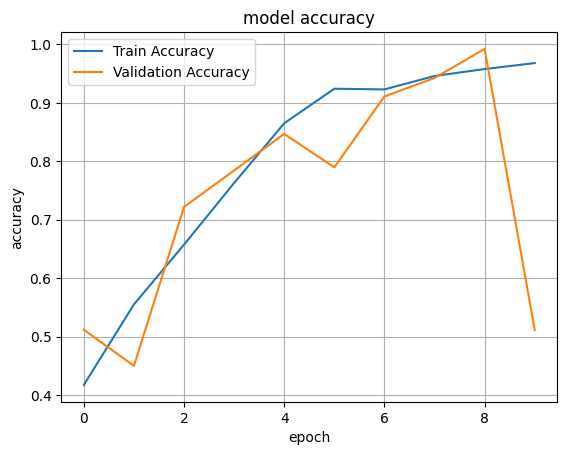

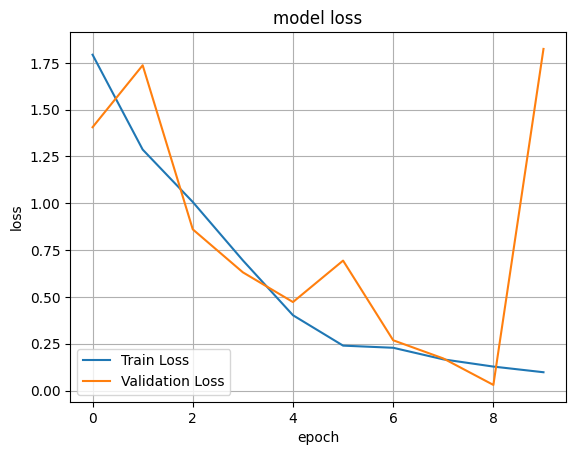

In [ ]:
import matplotlib.pyplot as plt
# Accuracy plot
plt.plot(history3.history['accuracy'], label = 'Train Accuracy')
plt.plot(history3.history['val_accuracy'], label = 'Validation Accuracy')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.grid(True)
plt.show()
# Loss plot
plt.plot(history3.history['loss'], label = 'Train Loss')
plt.plot(history3.history['val_loss'], label = 'Validation Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# refac pt 50 epoci cu Early stopping si ReduceLROnPlateau
# scad learning rate initial la 0.0001
# dropout 0.3 in fully connected layers si L2 regularization pe dense layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
image_size = (224, 224)
batch_size = 16

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
        'idenprof/idenprof/train',
        target_size=image_size,
        batch_size=batch_size,
        class_mode='categorical',
        subset = 'training',
        shuffle = True)

validation_generator = train_datagen.flow_from_directory(
        'idenprof/idenprof/train',
        target_size=image_size,
        batch_size=batch_size,
        class_mode='categorical',
        subset = 'validation',
        shuffle = False)

Found 7200 images belonging to 10 classes.
Found 1800 images belonging to 10 classes.


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras import regularizers

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Flatten(),

    Dense(256, activation='relu', kernel_regularizer= regularizers.l2(0.001)),
    BatchNormalization(),
    Dropout(0.3),

    Dense(train_generator.num_classes, activation='softmax')
])

optimizer = Adam(learning_rate=0.0001)

model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True)

checkpoint = ModelCheckpoint(
    'best_model_50epochs.h5'
    , monitor = 'val_loss'
    ,save_best_only=True
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    min_lr=1e-7
)

history4 = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=50,
    callbacks=[early_stop, checkpoint, reduce_lr]
)

model.save("final_model.h5")



/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step - accuracy: 0.3774 - loss: 2.6573

450/450 ━━━━━━━━━━━━━━━━━━━━ 119s 242ms/step - accuracy: 0.3776 - loss: 2.6566 - val_accuracy: 0.3228 - val_loss: 2.9641 - learning_rate: 1.0000e-04
Epoch 2/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step - accuracy: 0.6976 - loss: 1.4530

450/450 ━━━━━━━━━━━━━━━━━━━━ 110s 246ms/step - accuracy: 0.6975 - loss: 1.4530 - val_accuracy: 0.5583 - val_loss: 1.8768 - learning_rate: 1.0000e-04
Epoch 3/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 104s 230ms/step - accuracy: 0.8650 - loss: 0.9892 - val_accuracy: 0.5444 - val_loss: 2.0778 - learning_rate: 1.0000e-04
Epoch 4/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 104s 231ms/step - accuracy: 0.9461 - loss: 0.7760 - val_accuracy: 0.4944 - val_loss: 2.3624 - learning_rate: 1.0000e-04
Epoch 5/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 104s 232ms/step - accuracy: 0.9728 - loss: 0.6887 - val_accuracy: 0.5383 - val_loss: 2.2235 - learning_rate: 1.0000e-04
Epoch 6/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 104s 231ms/step - accuracy: 0.9819 - loss: 0.6330 - val_accuracy: 0.5550 - val_loss: 2.1681 - learning_rate: 1.0000e-04
Epoch 7/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 103s 229ms/step - accuracy: 0.9903 - loss: 0.5911 - val_accuracy: 0.5578 - val_loss: 2.0422 - learning_rate: 1.0000e-04
Epoch 8/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 104s 232ms/

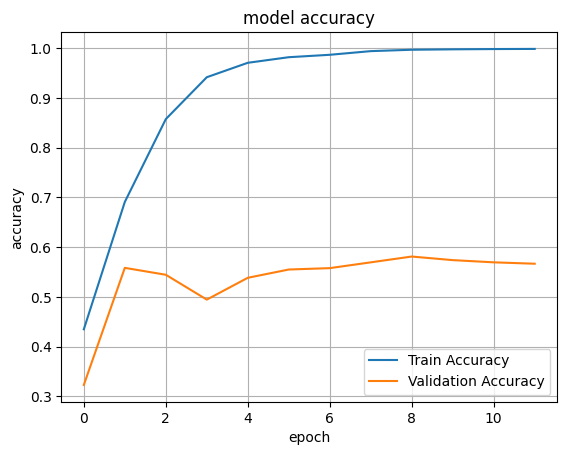

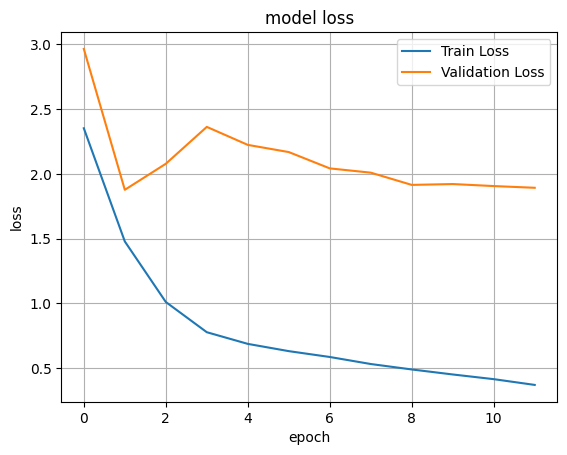

In [ ]:
import matplotlib.pyplot as plt
# Accuracy plot
plt.plot(history4.history['accuracy'], label = 'Train Accuracy')
plt.plot(history4.history['val_accuracy'], label = 'Validation Accuracy')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.grid(True)
plt.show()
# Loss plot
plt.plot(history4.history['loss'], label = 'Train Loss')
plt.plot(history4.history['val_loss'], label = 'Validation Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator


image_size = (128, 128)
batch_size = 16

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        rotation_range=20,
        horizontal_flip=True,
        validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
        'idenprof/idenprof/train',
        target_size=image_size,
        batch_size=batch_size,
        class_mode='categorical',
        subset = 'training',
        shuffle = True)

validation_generator = train_datagen.flow_from_directory(
        'idenprof/idenprof/train',
        target_size=image_size,
        batch_size=batch_size,
        class_mode='categorical',
        subset = 'validation',
        shuffle = False)
model = Sequential([
    Conv2D(16, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(32, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),

    Flatten(),

    Dense(128, activation='relu', kernel_regularizer= regularizers.l2(0.001)),
    BatchNormalization(),
    Dropout(0.3),

    Dense(train_generator.num_classes, activation='softmax')
])

optimizer = Adam(learning_rate=0.0001)

model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True)

checkpoint = ModelCheckpoint(
    'best_model_history5.h5'
    , monitor = 'val_loss'
    ,save_best_only=True
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    min_lr=1e-7
)

history5 = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=50,
    callbacks=[early_stop, checkpoint, reduce_lr]
)

model.save("best_model_history5.h5")



Found 7200 images belonging to 10 classes.
Found 1800 images belonging to 10 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.3188 - loss: 2.5039

450/450 ━━━━━━━━━━━━━━━━━━━━ 54s 101ms/step - accuracy: 0.3189 - loss: 2.5033 - val_accuracy: 0.3672 - val_loss: 2.1743 - learning_rate: 1.0000e-04
Epoch 2/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.4600 - loss: 1.9209

450/450 ━━━━━━━━━━━━━━━━━━━━ 41s 91ms/step - accuracy: 0.4600 - loss: 1.9208 - val_accuracy: 0.5189 - val_loss: 1.6937 - learning_rate: 1.0000e-04
Epoch 3/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.5010 - loss: 1.7790

450/450 ━━━━━━━━━━━━━━━━━━━━ 41s 91ms/step - accuracy: 0.5010 - loss: 1.7790 - val_accuracy: 0.5344 - val_loss: 1.6053 - learning_rate: 1.0000e-04
Epoch 4/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.4963 - loss: 1.7326

450/450 ━━━━━━━━━━━━━━━━━━━━ 43s 95ms/step - accuracy: 0.4963 - loss: 1.7326 - val_accuracy: 0.5556 - val_loss: 1.5717 - learning_rate: 1.0000e-04
Epoch 5/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.5171 - loss: 1.6592

450/450 ━━━━━━━━━━━━━━━━━━━━ 41s 90ms/step - accuracy: 0.5171 - loss: 1.6592 - val_accuracy: 0.5494 - val_loss: 1.5628 - learning_rate: 1.0000e-04
Epoch 6/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.5625 - loss: 1.5728

450/450 ━━━━━━━━━━━━━━━━━━━━ 43s 96ms/step - accuracy: 0.5625 - loss: 1.5728 - val_accuracy: 0.5928 - val_loss: 1.4774 - learning_rate: 1.0000e-04
Epoch 7/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.5563 - loss: 1.5505

450/450 ━━━━━━━━━━━━━━━━━━━━ 45s 99ms/step - accuracy: 0.5563 - loss: 1.5504 - val_accuracy: 0.5872 - val_loss: 1.4718 - learning_rate: 1.0000e-04
Epoch 8/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.5820 - loss: 1.4822

450/450 ━━━━━━━━━━━━━━━━━━━━ 47s 104ms/step - accuracy: 0.5820 - loss: 1.4822 - val_accuracy: 0.6011 - val_loss: 1.4622 - learning_rate: 1.0000e-04
Epoch 9/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.6033 - loss: 1.4266

450/450 ━━━━━━━━━━━━━━━━━━━━ 46s 103ms/step - accuracy: 0.6033 - loss: 1.4267 - val_accuracy: 0.6056 - val_loss: 1.3927 - learning_rate: 1.0000e-04
Epoch 10/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 45s 99ms/step - accuracy: 0.6029 - loss: 1.4264 - val_accuracy: 0.6144 - val_loss: 1.4116 - learning_rate: 1.0000e-04
Epoch 11/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.6132 - loss: 1.3747

450/450 ━━━━━━━━━━━━━━━━━━━━ 46s 101ms/step - accuracy: 0.6132 - loss: 1.3748 - val_accuracy: 0.6044 - val_loss: 1.3865 - learning_rate: 1.0000e-04
Epoch 12/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.6147 - loss: 1.3815

450/450 ━━━━━━━━━━━━━━━━━━━━ 46s 102ms/step - accuracy: 0.6147 - loss: 1.3815 - val_accuracy: 0.6111 - val_loss: 1.3776 - learning_rate: 1.0000e-04
Epoch 13/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.6205 - loss: 1.3534

450/450 ━━━━━━━━━━━━━━━━━━━━ 45s 101ms/step - accuracy: 0.6205 - loss: 1.3534 - val_accuracy: 0.6100 - val_loss: 1.3618 - learning_rate: 1.0000e-04
Epoch 14/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 46s 103ms/step - accuracy: 0.6351 - loss: 1.3029 - val_accuracy: 0.5817 - val_loss: 1.4594 - learning_rate: 1.0000e-04
Epoch 15/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.6544 - loss: 1.2604

450/450 ━━━━━━━━━━━━━━━━━━━━ 46s 102ms/step - accuracy: 0.6544 - loss: 1.2604 - val_accuracy: 0.6133 - val_loss: 1.3554 - learning_rate: 1.0000e-04
Epoch 16/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.6577 - loss: 1.2319

450/450 ━━━━━━━━━━━━━━━━━━━━ 45s 99ms/step - accuracy: 0.6577 - loss: 1.2319 - val_accuracy: 0.6289 - val_loss: 1.3127 - learning_rate: 1.0000e-04
Epoch 17/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 45s 101ms/step - accuracy: 0.6688 - loss: 1.2177 - val_accuracy: 0.6056 - val_loss: 1.3531 - learning_rate: 1.0000e-04
Epoch 18/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.6714 - loss: 1.2054

450/450 ━━━━━━━━━━━━━━━━━━━━ 45s 99ms/step - accuracy: 0.6714 - loss: 1.2054 - val_accuracy: 0.6328 - val_loss: 1.2956 - learning_rate: 1.0000e-04
Epoch 19/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 44s 98ms/step - accuracy: 0.6811 - loss: 1.1820 - val_accuracy: 0.6211 - val_loss: 1.3437 - learning_rate: 1.0000e-04
Epoch 20/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 46s 102ms/step - accuracy: 0.6821 - loss: 1.1707 - val_accuracy: 0.6317 - val_loss: 1.2972 - learning_rate: 1.0000e-04
Epoch 21/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 42s 94ms/step - accuracy: 0.6917 - loss: 1.1444 - val_accuracy: 0.6356 - val_loss: 1.3116 - learning_rate: 1.0000e-04
Epoch 22/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 85s 101ms/step - accuracy: 0.6848 - loss: 1.1625 - val_accuracy: 0.6272 - val_loss: 1.3041 - learning_rate: 1.0000e-04
Epoch 23/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.6968 - loss: 1.1225

450/450 ━━━━━━━━━━━━━━━━━━━━ 46s 101ms/step - accuracy: 0.6968 - loss: 1.1225 - val_accuracy: 0.6439 - val_loss: 1.2790 - learning_rate: 1.0000e-04
Epoch 24/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 43s 95ms/step - accuracy: 0.7002 - loss: 1.0990 - val_accuracy: 0.6372 - val_loss: 1.2851 - learning_rate: 1.0000e-04
Epoch 25/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 44s 98ms/step - accuracy: 0.7156 - loss: 1.0668 - val_accuracy: 0.6350 - val_loss: 1.3061 - learning_rate: 1.0000e-04
Epoch 26/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 43s 96ms/step - accuracy: 0.7089 - loss: 1.0893 - val_accuracy: 0.6417 - val_loss: 1.2871 - learning_rate: 1.0000e-04
Epoch 27/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.7048 - loss: 1.0807

450/450 ━━━━━━━━━━━━━━━━━━━━ 44s 97ms/step - accuracy: 0.7048 - loss: 1.0807 - val_accuracy: 0.6506 - val_loss: 1.2619 - learning_rate: 1.0000e-04
Epoch 28/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 42s 93ms/step - accuracy: 0.7104 - loss: 1.0496 - val_accuracy: 0.6489 - val_loss: 1.2713 - learning_rate: 1.0000e-04
Epoch 29/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step - accuracy: 0.7239 - loss: 1.0502

450/450 ━━━━━━━━━━━━━━━━━━━━ 45s 100ms/step - accuracy: 0.7239 - loss: 1.0502 - val_accuracy: 0.6483 - val_loss: 1.2602 - learning_rate: 1.0000e-04
Epoch 30/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 47s 104ms/step - accuracy: 0.7308 - loss: 1.0027 - val_accuracy: 0.6456 - val_loss: 1.3129 - learning_rate: 1.0000e-04
Epoch 31/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.7294 - loss: 1.0325

450/450 ━━━━━━━━━━━━━━━━━━━━ 44s 98ms/step - accuracy: 0.7294 - loss: 1.0325 - val_accuracy: 0.6567 - val_loss: 1.2545 - learning_rate: 1.0000e-04
Epoch 32/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.7310 - loss: 1.0073

450/450 ━━━━━━━━━━━━━━━━━━━━ 44s 97ms/step - accuracy: 0.7310 - loss: 1.0074 - val_accuracy: 0.6528 - val_loss: 1.2448 - learning_rate: 1.0000e-04
Epoch 33/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.7400 - loss: 0.9868

450/450 ━━━━━━━━━━━━━━━━━━━━ 42s 94ms/step - accuracy: 0.7400 - loss: 0.9868 - val_accuracy: 0.6578 - val_loss: 1.2375 - learning_rate: 1.0000e-04
Epoch 34/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 44s 97ms/step - accuracy: 0.7462 - loss: 0.9814 - val_accuracy: 0.6444 - val_loss: 1.2441 - learning_rate: 1.0000e-04
Epoch 35/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 43s 95ms/step - accuracy: 0.7417 - loss: 0.9861 - val_accuracy: 0.6528 - val_loss: 1.2949 - learning_rate: 1.0000e-04
Epoch 36/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.7528 - loss: 0.9709

450/450 ━━━━━━━━━━━━━━━━━━━━ 44s 98ms/step - accuracy: 0.7528 - loss: 0.9710 - val_accuracy: 0.6656 - val_loss: 1.2101 - learning_rate: 1.0000e-04
Epoch 37/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 43s 96ms/step - accuracy: 0.7439 - loss: 0.9692 - val_accuracy: 0.6622 - val_loss: 1.2329 - learning_rate: 1.0000e-04
Epoch 38/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 44s 98ms/step - accuracy: 0.7515 - loss: 0.9488 - val_accuracy: 0.6533 - val_loss: 1.2588 - learning_rate: 1.0000e-04
Epoch 39/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 43s 95ms/step - accuracy: 0.7679 - loss: 0.9145 - val_accuracy: 0.6561 - val_loss: 1.2221 - learning_rate: 1.0000e-04
Epoch 40/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 43s 96ms/step - accuracy: 0.7687 - loss: 0.9182 - val_accuracy: 0.6511 - val_loss: 1.2753 - learning_rate: 1.0000e-04
Epoch 41/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 40s 89ms/step - accuracy: 0.7716 - loss: 0.9288 - val_accuracy: 0.6828 - val_loss: 1.2166 - learning_rate: 1.0000e-04
Epoch 42/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - ac

450/450 ━━━━━━━━━━━━━━━━━━━━ 41s 90ms/step - accuracy: 0.7705 - loss: 0.8943 - val_accuracy: 0.6800 - val_loss: 1.2046 - learning_rate: 5.0000e-05
Epoch 43/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 41s 92ms/step - accuracy: 0.7914 - loss: 0.8528 - val_accuracy: 0.6928 - val_loss: 1.2064 - learning_rate: 5.0000e-05
Epoch 44/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.7926 - loss: 0.8481

450/450 ━━━━━━━━━━━━━━━━━━━━ 42s 93ms/step - accuracy: 0.7926 - loss: 0.8481 - val_accuracy: 0.6878 - val_loss: 1.1587 - learning_rate: 5.0000e-05
Epoch 45/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 44s 97ms/step - accuracy: 0.7861 - loss: 0.8395 - val_accuracy: 0.6672 - val_loss: 1.2069 - learning_rate: 5.0000e-05
Epoch 46/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 42s 92ms/step - accuracy: 0.7965 - loss: 0.8249 - val_accuracy: 0.6672 - val_loss: 1.2039 - learning_rate: 5.0000e-05
Epoch 47/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 82s 92ms/step - accuracy: 0.7978 - loss: 0.8013 - val_accuracy: 0.6822 - val_loss: 1.2087 - learning_rate: 5.0000e-05
Epoch 48/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - accuracy: 0.8045 - loss: 0.7934

450/450 ━━━━━━━━━━━━━━━━━━━━ 40s 90ms/step - accuracy: 0.8045 - loss: 0.7934 - val_accuracy: 0.6933 - val_loss: 1.1585 - learning_rate: 5.0000e-05
Epoch 49/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 41s 91ms/step - accuracy: 0.7931 - loss: 0.8201 - val_accuracy: 0.6828 - val_loss: 1.1788 - learning_rate: 5.0000e-05
Epoch 50/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 41s 91ms/step - accuracy: 0.7899 - loss: 0.8262 - val_accuracy: 0.6867 - val_loss: 1.1613 - learning_rate: 5.0000e-05


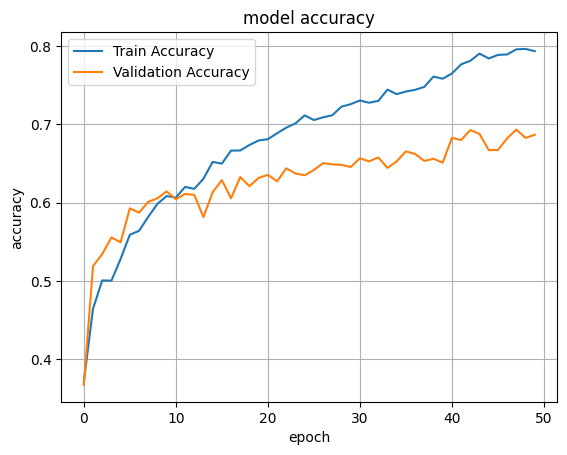

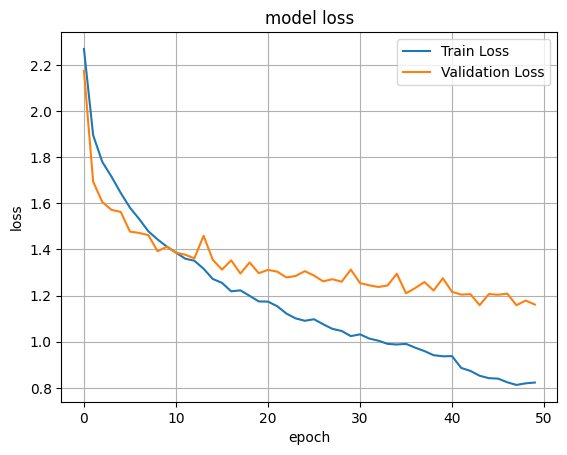

In [ ]:
import matplotlib.pyplot as plt
# Accuracy plot
plt.plot(history5.history['accuracy'], label = 'Train Accuracy')
plt.plot(history5.history['val_accuracy'], label = 'Validation Accuracy')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.grid(True)
plt.show()
# Loss plot
plt.plot(history5.history['loss'], label = 'Train Loss')
plt.plot(history5.history['val_loss'], label = 'Validation Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator


image_size = (128, 128)
batch_size = 16

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        rotation_range=20,
        horizontal_flip=True,
        width_shift_range=0.1,
        height_shift_range=0.1,
        brightness_range=[0.8, 1.2],
        validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
        'idenprof/idenprof/train',
        target_size=image_size,
        batch_size=batch_size,
        class_mode='categorical',
        subset = 'training',
        shuffle = True)

validation_generator = train_datagen.flow_from_directory(
        'idenprof/idenprof/train',
        target_size=image_size,
        batch_size=batch_size,
        class_mode='categorical',
        subset = 'validation',
        shuffle = False)

base_model = MobileNetV2(
    weights='imagenet',
    include_top=False,
    input_shape=(128, 128, 3)
)

base_model.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu', kernel_regularizer= regularizers.l2(0.001))(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

optimizer = Adam(learning_rate=0.0001)
model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True)

checkpoint = ModelCheckpoint(
    'best_model_history6.h5'
    , monitor = 'val_loss'
    ,save_best_only=True
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    min_lr=1e-7
)

history6 = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=50,
    callbacks=[early_stop, checkpoint, reduce_lr]
)
from google.colab import drive
drive.mount('/content/drive')
model.save('/content/drive/MyDrive/best_model_history6.h5')



Found 7200 images belonging to 10 classes.
Found 1800 images belonging to 10 classes.
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step - accuracy: 0.2847 - loss: 2.5472

450/450 ━━━━━━━━━━━━━━━━━━━━ 150s 317ms/step - accuracy: 0.2849 - loss: 2.5462 - val_accuracy: 0.6161 - val_loss: 1.3659 - learning_rate: 1.0000e-04
Epoch 2/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step - accuracy: 0.5833 - loss: 1.5183

450/450 ━━━━━━━━━━━━━━━━━━━━ 150s 333ms/step - accuracy: 0.5833 - loss: 1.5181 - val_accuracy: 0.6694 - val_loss: 1.1880 - learning_rate: 1.0000e-04
Epoch 3/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step - accuracy: 0.6497 - loss: 1.2723

450/450 ━━━━━━━━━━━━━━━━━━━━ 148s 329ms/step - accuracy: 0.6497 - loss: 1.2723 - val_accuracy: 0.7178 - val_loss: 1.0585 - learning_rate: 1.0000e-04
Epoch 4/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step - accuracy: 0.6873 - loss: 1.1758

450/450 ━━━━━━━━━━━━━━━━━━━━ 137s 305ms/step - accuracy: 0.6873 - loss: 1.1758 - val_accuracy: 0.7178 - val_loss: 1.0332 - learning_rate: 1.0000e-04
Epoch 5/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step - accuracy: 0.7016 - loss: 1.1378

450/450 ━━━━━━━━━━━━━━━━━━━━ 136s 302ms/step - accuracy: 0.7016 - loss: 1.1378 - val_accuracy: 0.7394 - val_loss: 0.9869 - learning_rate: 1.0000e-04
Epoch 6/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step - accuracy: 0.7139 - loss: 1.0878

450/450 ━━━━━━━━━━━━━━━━━━━━ 150s 333ms/step - accuracy: 0.7139 - loss: 1.0878 - val_accuracy: 0.7506 - val_loss: 0.9634 - learning_rate: 1.0000e-04
Epoch 7/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 135s 300ms/step - accuracy: 0.7226 - loss: 1.0302 - val_accuracy: 0.7411 - val_loss: 0.9748 - learning_rate: 1.0000e-04
Epoch 8/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 136s 303ms/step - accuracy: 0.7334 - loss: 1.0054 - val_accuracy: 0.7456 - val_loss: 0.9701 - learning_rate: 1.0000e-04
Epoch 9/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step - accuracy: 0.7379 - loss: 0.9897

450/450 ━━━━━━━━━━━━━━━━━━━━ 137s 304ms/step - accuracy: 0.7379 - loss: 0.9897 - val_accuracy: 0.7561 - val_loss: 0.9226 - learning_rate: 1.0000e-04
Epoch 10/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step - accuracy: 0.7444 - loss: 0.9575

450/450 ━━━━━━━━━━━━━━━━━━━━ 157s 337ms/step - accuracy: 0.7444 - loss: 0.9576 - val_accuracy: 0.7678 - val_loss: 0.8968 - learning_rate: 1.0000e-04
Epoch 11/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 150s 334ms/step - accuracy: 0.7541 - loss: 0.9453 - val_accuracy: 0.7567 - val_loss: 0.9145 - learning_rate: 1.0000e-04
Epoch 12/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step - accuracy: 0.7467 - loss: 0.9333

450/450 ━━━━━━━━━━━━━━━━━━━━ 139s 309ms/step - accuracy: 0.7467 - loss: 0.9333 - val_accuracy: 0.7767 - val_loss: 0.8842 - learning_rate: 1.0000e-04
Epoch 13/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 151s 335ms/step - accuracy: 0.7681 - loss: 0.9098 - val_accuracy: 0.7594 - val_loss: 0.8867 - learning_rate: 1.0000e-04
Epoch 14/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step - accuracy: 0.7727 - loss: 0.8686

450/450 ━━━━━━━━━━━━━━━━━━━━ 150s 334ms/step - accuracy: 0.7727 - loss: 0.8686 - val_accuracy: 0.7794 - val_loss: 0.8763 - learning_rate: 1.0000e-04
Epoch 15/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 135s 300ms/step - accuracy: 0.7548 - loss: 0.9003 - val_accuracy: 0.7739 - val_loss: 0.8800 - learning_rate: 1.0000e-04
Epoch 16/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step - accuracy: 0.7770 - loss: 0.8639

450/450 ━━━━━━━━━━━━━━━━━━━━ 136s 303ms/step - accuracy: 0.7769 - loss: 0.8639 - val_accuracy: 0.7744 - val_loss: 0.8570 - learning_rate: 1.0000e-04
Epoch 17/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 150s 333ms/step - accuracy: 0.7765 - loss: 0.8439 - val_accuracy: 0.7622 - val_loss: 0.8856 - learning_rate: 1.0000e-04
Epoch 18/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 134s 298ms/step - accuracy: 0.7751 - loss: 0.8448 - val_accuracy: 0.7572 - val_loss: 0.8673 - learning_rate: 1.0000e-04
Epoch 19/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 134s 298ms/step - accuracy: 0.7861 - loss: 0.8316 - val_accuracy: 0.7672 - val_loss: 0.8650 - learning_rate: 1.0000e-04
Epoch 20/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step - accuracy: 0.7822 - loss: 0.8157

450/450 ━━━━━━━━━━━━━━━━━━━━ 151s 335ms/step - accuracy: 0.7822 - loss: 0.8157 - val_accuracy: 0.7600 - val_loss: 0.8513 - learning_rate: 1.0000e-04
Epoch 21/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 136s 303ms/step - accuracy: 0.7895 - loss: 0.8074 - val_accuracy: 0.7694 - val_loss: 0.8541 - learning_rate: 1.0000e-04
Epoch 22/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step - accuracy: 0.7844 - loss: 0.8056

450/450 ━━━━━━━━━━━━━━━━━━━━ 137s 305ms/step - accuracy: 0.7844 - loss: 0.8056 - val_accuracy: 0.7722 - val_loss: 0.8237 - learning_rate: 1.0000e-04
Epoch 23/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 140s 301ms/step - accuracy: 0.7892 - loss: 0.7882 - val_accuracy: 0.7672 - val_loss: 0.8635 - learning_rate: 1.0000e-04
Epoch 24/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 137s 304ms/step - accuracy: 0.7887 - loss: 0.7700 - val_accuracy: 0.7772 - val_loss: 0.8447 - learning_rate: 1.0000e-04
Epoch 25/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 139s 308ms/step - accuracy: 0.7922 - loss: 0.7622 - val_accuracy: 0.7800 - val_loss: 0.8438 - learning_rate: 1.0000e-04
Epoch 26/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step - accuracy: 0.7960 - loss: 0.7559

450/450 ━━━━━━━━━━━━━━━━━━━━ 151s 336ms/step - accuracy: 0.7959 - loss: 0.7559 - val_accuracy: 0.7772 - val_loss: 0.8200 - learning_rate: 1.0000e-04
Epoch 27/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 137s 305ms/step - accuracy: 0.7971 - loss: 0.7367 - val_accuracy: 0.7694 - val_loss: 0.8352 - learning_rate: 1.0000e-04
Epoch 28/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 136s 302ms/step - accuracy: 0.7880 - loss: 0.7657 - val_accuracy: 0.7772 - val_loss: 0.8296 - learning_rate: 1.0000e-04
Epoch 29/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 136s 303ms/step - accuracy: 0.8070 - loss: 0.7204 - val_accuracy: 0.7789 - val_loss: 0.8222 - learning_rate: 1.0000e-04
Epoch 30/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step - accuracy: 0.8032 - loss: 0.7305

450/450 ━━━━━━━━━━━━━━━━━━━━ 152s 338ms/step - accuracy: 0.8032 - loss: 0.7305 - val_accuracy: 0.7711 - val_loss: 0.8050 - learning_rate: 1.0000e-04
Epoch 31/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step - accuracy: 0.7883 - loss: 0.7542

450/450 ━━━━━━━━━━━━━━━━━━━━ 150s 334ms/step - accuracy: 0.7883 - loss: 0.7542 - val_accuracy: 0.7778 - val_loss: 0.7999 - learning_rate: 1.0000e-04
Epoch 32/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 149s 331ms/step - accuracy: 0.7957 - loss: 0.7403 - val_accuracy: 0.7750 - val_loss: 0.8168 - learning_rate: 1.0000e-04
Epoch 33/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 136s 303ms/step - accuracy: 0.8082 - loss: 0.7128 - val_accuracy: 0.7700 - val_loss: 0.8468 - learning_rate: 1.0000e-04
Epoch 34/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 135s 300ms/step - accuracy: 0.7994 - loss: 0.7144 - val_accuracy: 0.7744 - val_loss: 0.8101 - learning_rate: 1.0000e-04
Epoch 35/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step - accuracy: 0.8025 - loss: 0.7146

450/450 ━━━━━━━━━━━━━━━━━━━━ 134s 299ms/step - accuracy: 0.8025 - loss: 0.7146 - val_accuracy: 0.7844 - val_loss: 0.7958 - learning_rate: 1.0000e-04
Epoch 36/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step - accuracy: 0.8073 - loss: 0.6974

450/450 ━━━━━━━━━━━━━━━━━━━━ 138s 306ms/step - accuracy: 0.8073 - loss: 0.6975 - val_accuracy: 0.7906 - val_loss: 0.7886 - learning_rate: 1.0000e-04
Epoch 37/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 138s 308ms/step - accuracy: 0.8103 - loss: 0.6833 - val_accuracy: 0.7833 - val_loss: 0.7976 - learning_rate: 1.0000e-04
Epoch 38/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 152s 338ms/step - accuracy: 0.8146 - loss: 0.6879 - val_accuracy: 0.7739 - val_loss: 0.8070 - learning_rate: 1.0000e-04
Epoch 39/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 137s 305ms/step - accuracy: 0.8098 - loss: 0.6866 - val_accuracy: 0.7817 - val_loss: 0.7928 - learning_rate: 1.0000e-04
Epoch 40/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 136s 303ms/step - accuracy: 0.8054 - loss: 0.6923 - val_accuracy: 0.7711 - val_loss: 0.8239 - learning_rate: 1.0000e-04
Epoch 41/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 152s 338ms/step - accuracy: 0.8177 - loss: 0.6724 - val_accuracy: 0.7778 - val_loss: 0.8070 - learning_rate: 1.0000e-04
Epoch 42/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 138s 

450/450 ━━━━━━━━━━━━━━━━━━━━ 136s 303ms/step - accuracy: 0.8242 - loss: 0.6575 - val_accuracy: 0.7900 - val_loss: 0.7691 - learning_rate: 5.0000e-05
Epoch 44/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 151s 335ms/step - accuracy: 0.8200 - loss: 0.6630 - val_accuracy: 0.7689 - val_loss: 0.7858 - learning_rate: 5.0000e-05
Epoch 45/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 149s 331ms/step - accuracy: 0.8269 - loss: 0.6542 - val_accuracy: 0.7761 - val_loss: 0.7914 - learning_rate: 5.0000e-05
Epoch 46/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 190s 305ms/step - accuracy: 0.8200 - loss: 0.6517 - val_accuracy: 0.7772 - val_loss: 0.7923 - learning_rate: 5.0000e-05
Epoch 47/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step - accuracy: 0.8220 - loss: 0.6475

450/450 ━━━━━━━━━━━━━━━━━━━━ 136s 303ms/step - accuracy: 0.8220 - loss: 0.6476 - val_accuracy: 0.7767 - val_loss: 0.7653 - learning_rate: 5.0000e-05
Epoch 48/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 137s 305ms/step - accuracy: 0.8220 - loss: 0.6499 - val_accuracy: 0.7817 - val_loss: 0.7790 - learning_rate: 5.0000e-05
Epoch 49/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 137s 304ms/step - accuracy: 0.8221 - loss: 0.6281 - val_accuracy: 0.7789 - val_loss: 0.7977 - learning_rate: 5.0000e-05
Epoch 50/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 137s 305ms/step - accuracy: 0.8265 - loss: 0.6426 - val_accuracy: 0.7783 - val_loss: 0.7941 - learning_rate: 5.0000e-05


Mounted at /content/drive


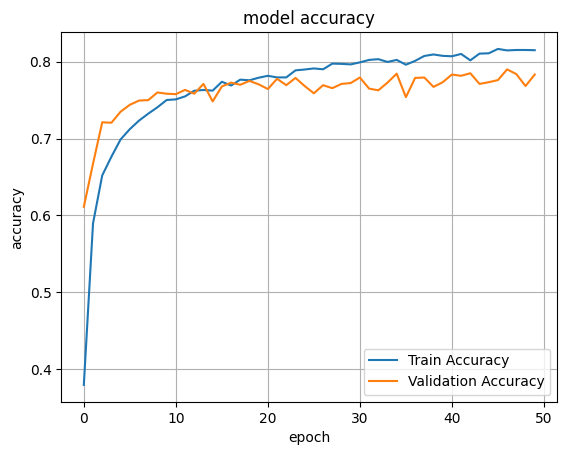

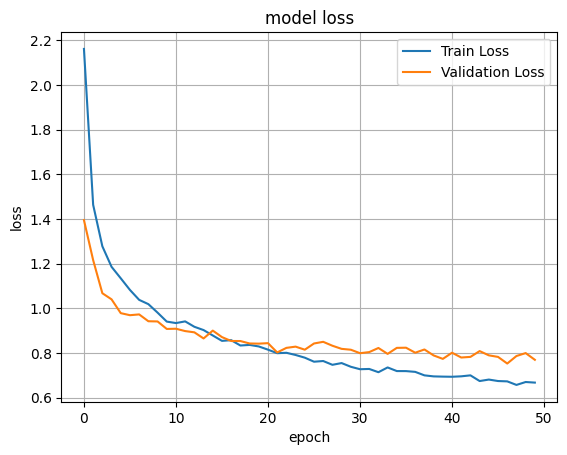

In [ ]:
import matplotlib.pyplot as plt
# Accuracy plot
plt.plot(history6.history['accuracy'], label = 'Train Accuracy')
plt.plot(history6.history['val_accuracy'], label = 'Validation Accuracy')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.grid(True)
plt.show()
# Loss plot
plt.plot(history6.history['loss'], label = 'Train Loss')
plt.plot(history6.history['val_loss'], label = 'Validation Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator


image_size = (128, 128)
batch_size = 16

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        rotation_range=20,
        horizontal_flip=True,
        width_shift_range=0.1,
        height_shift_range=0.1,
        brightness_range=[0.8, 1.2],
        validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
        'idenprof/idenprof/train',
        target_size=image_size,
        batch_size=batch_size,
        class_mode='categorical',
        subset = 'training',
        shuffle = True)

validation_generator = train_datagen.flow_from_directory(
        'idenprof/idenprof/train',
        target_size=image_size,
        batch_size=batch_size,
        class_mode='categorical',
        subset = 'validation',
        shuffle = False)

#from tensorflow.keras.models import load_model
#model = load_model('/content/drive/MyDrive/best_model_history6.h5')


base_model = MobileNetV2(weights='imagenet',include_top=False, input_shape=(128,128,3)) # mobileNetV2 e primul layer
base_model.trainable = True

for layer in base_model.layers[:-30]:
    layer.trainable = False

    x= base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.5)(x)
    predictions = Dense(10, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=predictions)

optimizer = Adam(learning_rate=1e-5)
model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True)

checkpoint = ModelCheckpoint(
    'best_model_finetune.h5'
    , monitor = 'val_loss'
    ,save_best_only=True
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    min_lr=1e-7
)

history_finetune = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=50,
    callbacks=[early_stop, checkpoint, reduce_lr]
)
from google.colab import drive
drive.mount('/content/drive')

model.save("/content/drive/MyDrive/finetune_model.h5")



Found 7200 images belonging to 10 classes.
Found 1800 images belonging to 10 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step - accuracy: 0.1515 - loss: 2.7903

450/450 ━━━━━━━━━━━━━━━━━━━━ 216s 450ms/step - accuracy: 0.1516 - loss: 2.7896 - val_accuracy: 0.4233 - val_loss: 1.6405 - learning_rate: 1.0000e-05
Epoch 2/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step - accuracy: 0.3634 - loss: 1.9140

450/450 ━━━━━━━━━━━━━━━━━━━━ 189s 421ms/step - accuracy: 0.3634 - loss: 1.9137 - val_accuracy: 0.5550 - val_loss: 1.2754 - learning_rate: 1.0000e-05
Epoch 3/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step - accuracy: 0.4712 - loss: 1.5593

450/450 ━━━━━━━━━━━━━━━━━━━━ 200s 444ms/step - accuracy: 0.4713 - loss: 1.5591 - val_accuracy: 0.6522 - val_loss: 1.0172 - learning_rate: 1.0000e-05
Epoch 4/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step - accuracy: 0.5497 - loss: 1.3373

450/450 ━━━━━━━━━━━━━━━━━━━━ 187s 415ms/step - accuracy: 0.5498 - loss: 1.3372 - val_accuracy: 0.6794 - val_loss: 0.9352 - learning_rate: 1.0000e-05
Epoch 5/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step - accuracy: 0.5951 - loss: 1.1789

450/450 ━━━━━━━━━━━━━━━━━━━━ 188s 419ms/step - accuracy: 0.5951 - loss: 1.1788 - val_accuracy: 0.7100 - val_loss: 0.8437 - learning_rate: 1.0000e-05
Epoch 6/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step - accuracy: 0.6300 - loss: 1.0684

450/450 ━━━━━━━━━━━━━━━━━━━━ 187s 415ms/step - accuracy: 0.6300 - loss: 1.0684 - val_accuracy: 0.7367 - val_loss: 0.7683 - learning_rate: 1.0000e-05
Epoch 7/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step - accuracy: 0.6626 - loss: 1.0004

450/450 ━━━━━━━━━━━━━━━━━━━━ 197s 438ms/step - accuracy: 0.6626 - loss: 1.0003 - val_accuracy: 0.7461 - val_loss: 0.7456 - learning_rate: 1.0000e-05
Epoch 8/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step - accuracy: 0.6891 - loss: 0.9234

450/450 ━━━━━━━━━━━━━━━━━━━━ 198s 441ms/step - accuracy: 0.6891 - loss: 0.9234 - val_accuracy: 0.7506 - val_loss: 0.7274 - learning_rate: 1.0000e-05
Epoch 9/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 0s 343ms/step - accuracy: 0.6857 - loss: 0.9501

450/450 ━━━━━━━━━━━━━━━━━━━━ 183s 407ms/step - accuracy: 0.6857 - loss: 0.9500 - val_accuracy: 0.7578 - val_loss: 0.7051 - learning_rate: 1.0000e-05
Epoch 10/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step - accuracy: 0.7116 - loss: 0.8788

450/450 ━━━━━━━━━━━━━━━━━━━━ 207s 418ms/step - accuracy: 0.7117 - loss: 0.8787 - val_accuracy: 0.7672 - val_loss: 0.6748 - learning_rate: 1.0000e-05
Epoch 11/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step - accuracy: 0.7233 - loss: 0.7997

450/450 ━━━━━━━━━━━━━━━━━━━━ 187s 416ms/step - accuracy: 0.7233 - loss: 0.7997 - val_accuracy: 0.7878 - val_loss: 0.6455 - learning_rate: 1.0000e-05
Epoch 12/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step - accuracy: 0.7297 - loss: 0.7989

450/450 ━━━━━━━━━━━━━━━━━━━━ 197s 438ms/step - accuracy: 0.7297 - loss: 0.7989 - val_accuracy: 0.7733 - val_loss: 0.6433 - learning_rate: 1.0000e-05
Epoch 13/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step - accuracy: 0.7329 - loss: 0.7828

450/450 ━━━━━━━━━━━━━━━━━━━━ 188s 418ms/step - accuracy: 0.7329 - loss: 0.7827 - val_accuracy: 0.7750 - val_loss: 0.6153 - learning_rate: 1.0000e-05
Epoch 14/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 185s 411ms/step - accuracy: 0.7379 - loss: 0.7555 - val_accuracy: 0.7844 - val_loss: 0.6280 - learning_rate: 1.0000e-05
Epoch 15/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 186s 413ms/step - accuracy: 0.7571 - loss: 0.7043 - val_accuracy: 0.7828 - val_loss: 0.6383 - learning_rate: 1.0000e-05
Epoch 16/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step - accuracy: 0.7604 - loss: 0.7183

450/450 ━━━━━━━━━━━━━━━━━━━━ 186s 414ms/step - accuracy: 0.7604 - loss: 0.7182 - val_accuracy: 0.7917 - val_loss: 0.6003 - learning_rate: 1.0000e-05
Epoch 17/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 188s 417ms/step - accuracy: 0.7657 - loss: 0.6751 - val_accuracy: 0.7878 - val_loss: 0.6054 - learning_rate: 1.0000e-05
Epoch 18/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step - accuracy: 0.7738 - loss: 0.6593

450/450 ━━━━━━━━━━━━━━━━━━━━ 204s 422ms/step - accuracy: 0.7738 - loss: 0.6593 - val_accuracy: 0.7994 - val_loss: 0.5832 - learning_rate: 1.0000e-05
Epoch 19/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step - accuracy: 0.7762 - loss: 0.6640

450/450 ━━━━━━━━━━━━━━━━━━━━ 212s 445ms/step - accuracy: 0.7762 - loss: 0.6640 - val_accuracy: 0.7989 - val_loss: 0.5652 - learning_rate: 1.0000e-05
Epoch 20/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step - accuracy: 0.7935 - loss: 0.6195

450/450 ━━━━━━━━━━━━━━━━━━━━ 188s 414ms/step - accuracy: 0.7935 - loss: 0.6195 - val_accuracy: 0.8100 - val_loss: 0.5468 - learning_rate: 1.0000e-05
Epoch 21/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 203s 418ms/step - accuracy: 0.8020 - loss: 0.5989 - val_accuracy: 0.8117 - val_loss: 0.5524 - learning_rate: 1.0000e-05
Epoch 22/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 216s 448ms/step - accuracy: 0.7902 - loss: 0.6130 - val_accuracy: 0.7906 - val_loss: 0.5722 - learning_rate: 1.0000e-05
Epoch 23/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 189s 420ms/step - accuracy: 0.8054 - loss: 0.5967 - val_accuracy: 0.8039 - val_loss: 0.5782 - learning_rate: 1.0000e-05
Epoch 24/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step - accuracy: 0.8044 - loss: 0.5489

450/450 ━━━━━━━━━━━━━━━━━━━━ 189s 420ms/step - accuracy: 0.8044 - loss: 0.5490 - val_accuracy: 0.8183 - val_loss: 0.5164 - learning_rate: 1.0000e-05
Epoch 25/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 190s 422ms/step - accuracy: 0.7944 - loss: 0.5960 - val_accuracy: 0.8117 - val_loss: 0.5681 - learning_rate: 1.0000e-05
Epoch 26/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 191s 424ms/step - accuracy: 0.8024 - loss: 0.5406 - val_accuracy: 0.8161 - val_loss: 0.5685 - learning_rate: 1.0000e-05
Epoch 27/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 203s 452ms/step - accuracy: 0.8220 - loss: 0.5279 - val_accuracy: 0.8189 - val_loss: 0.5513 - learning_rate: 1.0000e-05
Epoch 28/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 262s 453ms/step - accuracy: 0.8122 - loss: 0.5460 - val_accuracy: 0.8072 - val_loss: 0.5562 - learning_rate: 1.0000e-05
Epoch 29/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 246s 418ms/step - accuracy: 0.8234 - loss: 0.5135 - val_accuracy: 0.7983 - val_loss: 0.5689 - learning_rate: 1.0000e-05
Epoch 30/50
450/450 ━━━━━━━━━━━━━━━━━━━━ 189s 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


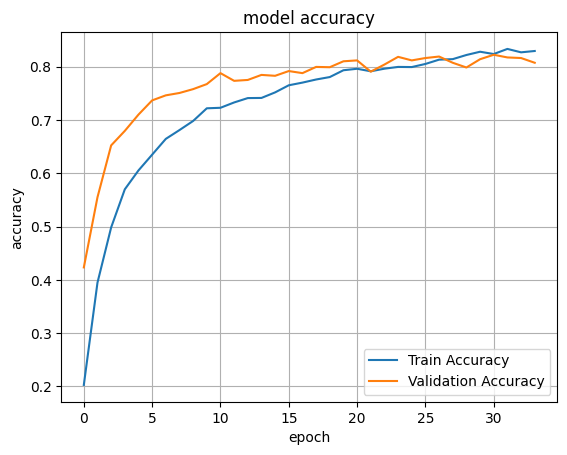

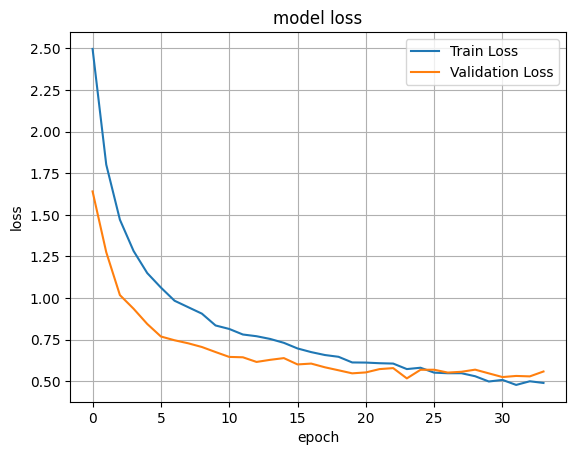

In [ ]:
import matplotlib.pyplot as plt
# Accuracy plot
plt.plot(history_finetune.history['accuracy'], label = 'Train Accuracy')
plt.plot(history_finetune.history['val_accuracy'], label = 'Validation Accuracy')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.grid(True)
plt.show()
# Loss plot
plt.plot(history_finetune.history['loss'], label = 'Train Loss')
plt.plot(history_finetune.history['val_loss'], label = 'Validation Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving random_image.webp to random_image.webp


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np

model = tf.keras.models.load_model('/content/drive/MyDrive/finetune_model.h5')

class_names = [
    'chef' , 'doctor' , 'engineer', 'farmer', 'firefighter',
    'judge', 'mechanic', 'pilot', 'police', 'waiter'
]

img_path = '/content/random_image.webp'
img = image.load_img(img_path, target_size=(128, 128))
img_array = image.img_to_array(img)
img_array = img_array / 255.0
img_array = np.expand_dims(img_array, axis=0)

preds = model.predict(img_array)
pred_class = class_names[np.argmax(preds)]
confidence = np.max(preds)

print(f"Predicted class: {pred_class} (confidence: {confidence:.2f})")

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicted class: police (confidence: 0.95)


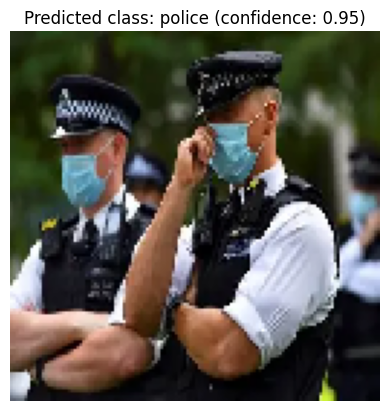

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(img)
plt.title(f"Predicted class: {pred_class} (confidence: {confidence:.2f})")
plt.axis('off')
plt.show()

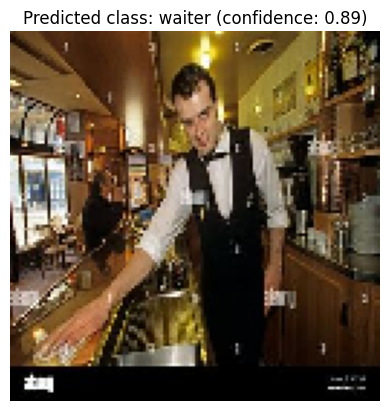

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(img)
plt.title(f"Predicted class: {pred_class} (confidence: {confidence:.2f})")
plt.axis('off')
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%pip install keras==2.11

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 17.9 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 3.8.0
    Uninstalling keras-3.8.0:
      Successfully uninstalled keras-3.8.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.18.0 requires keras>=3.5.0, but you have keras 2.11.0 which is incompatible.


In [ ]:
%pip install deepface

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.6/108.6 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 27.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 28.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 24.5 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.7.0-py3-none-any.whl size=114249 sha256=46719a3ecafebdea65e81c21d48d8e5e91cbb69819cd956ab334fef4f7b4830a
  Stored in directory: /root/.cache/pip/wheels/46/54/24/1624fd5b8674eb1188623f7e8e17cdf7c0f6c24b609dfb8a89
Successfully built fire
  Attempting uninstall: keras
    Found existing installation: keras 2.11.0
    Uninstalling keras-2.11.0:
      Successfully uninstalled keras-2.11.0


In [ ]:
%pip install retina-face

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving archive.zip to archive.zip


In [ ]:
!unzip archive.zip -d archive

Streaming output truncated to the last 5000 lines.
  inflating: archive/crop_part1/crop_part1/34_1_0_20170109004755204.jpg.chip.jpg  
  inflating: archive/crop_part1/crop_part1/34_1_0_20170111182452832.jpg.chip.jpg  
  inflating: archive/crop_part1/crop_part1/34_1_1_20170103230340961.jpg.chip.jpg  
  inflating: archive/crop_part1/crop_part1/34_1_1_20170104011329697.jpg.chip.jpg  
  inflating: archive/crop_part1/crop_part1/34_1_1_20170104165020320.jpg.chip.jpg  
  inflating: archive/crop_part1/crop_part1/34_1_1_20170108230211421.jpg.chip.jpg  
  inflating: archive/crop_part1/crop_part1/34_1_2_20170104022134829.jpg.chip.jpg  
  inflating: archive/crop_part1/crop_part1/34_1_2_20170104023010725.jpg.chip.jpg  
  inflating: archive/crop_part1/crop_part1/34_1_2_20170104172537171.jpg.chip.jpg  
  inflating: archive/crop_part1/crop_part1/34_1_2_20170104201443273.jpg.chip.jpg  
  inflating: archive/crop_part1/crop_part1/34_1_2_20170104204327523.jpg.chip.jpg  
  inflating: archive/crop_part1/crop

In [ ]:
import os
import shutil

src_dir = 'archive/UTKFace/UTKFace'
dst_dir = 'UTKFace_age'

for age_group in ['child', 'adult', 'senior']:
  os.makedirs(os.path.join(dst_dir,age_group), exist_ok=True)

counter = {'child':0, 'adult':0, 'senior':0}
for file in os.listdir(src_dir):
    if file.lower().endswith(('.jpg', '.jpeg', '.png')):
        try:
           age = int(file.split('_')[0])

           if age < 18:
            group = 'child'
           elif age < 60:
            group = 'adult'
           else:
            group = 'senior'

           src_path = os.path.join(src_dir, file)
           dst_path = os.path.join(dst_dir, group, file)
           shutil.copy2(src_path, dst_path)
           counter[group] += 1

        except Exception as e:
            print(f"Failed on {file}: {e}")

print("\n Distributie imagini:")
for group, count in counter.items():
    print(f"{group}: {count} imagini")




 Distributie imagini:
child: 4233 imagini
adult: 16785 imagini
senior: 2690 imagini


In [ ]:
import os

print(len(os.listdir('archive/UTKFace/UTKFace')))
print(os.listdir('archive/UTKFace/UTKFace')[:5])


23708
['26_1_4_20170117200115644.jpg.chip.jpg', '55_0_0_20170117183201893.jpg.chip.jpg', '65_0_0_20170120223720869.jpg.chip.jpg', '3_1_0_20170109191527360.jpg.chip.jpg', '20_1_0_20170109213016635.jpg.chip.jpg']


In [ ]:
for file in os.listdir('archive/UTKFace/UTKFace')[:5]:
  print(file,file.split('_')[0])

26_1_4_20170117200115644.jpg.chip.jpg 26
55_0_0_20170117183201893.jpg.chip.jpg 55
65_0_0_20170120223720869.jpg.chip.jpg 65
3_1_0_20170109191527360.jpg.chip.jpg 3
20_1_0_20170109213016635.jpg.chip.jpg 20


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    shear_range = 0.2,
    zoom_range = 0.3,
    rotation_range = 30,
    horizontal_flip = True
)

train_gen = datagen.flow_from_directory(
    'UTKFace_age',
    target_size = (98, 98),
    batch_size = 64,
    class_mode = 'categorical',
    subset = 'training'
)

val_gen = datagen.flow_from_directory(
    'UTKFace_age',
    target_size = (98, 98),
    batch_size = 64,
    class_mode = 'categorical',
    subset = 'validation'
)

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
base_model.trainable = True

for layer in base_model.layers[:-50]:
  layer.trainable = False

  x= base_model.output
  x = GlobalAveragePooling2D()(x)
  x = Dropout(0.5)(x)
  predictions = Dense(train_gen.num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)
adam_optimizer = Adam(learning_rate=1e-5)
model.compile(
    optimizer= adam_optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

labels = train_gen.classes

class_weights = compute_class_weight('balanced', classes=np.unique(labels), y=labels)
class_weights_dict = dict(enumerate(class_weights))

callbacks = [
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
    ModelCheckpoint('best_model_age_balanced2_UTK.h5', monitor='val_loss', save_best_only=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-7)
]

history_age_balanced2_UTK = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=50,
    callbacks=callbacks,
    class_weight=class_weights_dict
)

model.save('model_age_balanced2_UTK.h5')

Found 18967 images belonging to 3 classes.
Found 4741 images belonging to 3 classes.
Epoch 1/50
297/297 [==============================] - 357s 1s/step - loss: 1.1841 - accuracy: 0.5130 - val_loss: 1.2284 - val_accuracy: 0.4345 - lr: 1.0000e-05
Epoch 2/50
297/297 [==============================] - 377s 1s/step - loss: 0.7916 - accuracy: 0.6233 - val_loss: 1.1046 - val_accuracy: 0.5410 - lr: 1.0000e-05
Epoch 3/50
297/297 [==============================] - 339s 1s/step - loss: 0.7248 - accuracy: 0.6704 - val_loss: 0.9847 - val_accuracy: 0.6092 - lr: 1.0000e-05
Epoch 4/50
297/297 [==============================] - 374s 1s/step - loss: 0.6559 - accuracy: 0.7003 - val_loss: 0.9108 - val_accuracy: 0.6509 - lr: 1.0000e-05
Epoch 5/50
297/297 [==============================] - 340s 1s/step - loss: 0.6324 - accuracy: 0.7202 - val_loss: 0.8396 - val_accuracy: 0.6817 - lr: 1.0000e-05
Epoch 6/50
297/297 [==============================] - 380s 1s/step - loss: 0.6061 - accuracy: 0.7301 - val_loss: 0.

In [ ]:
import os
import shutil
import random

src_dir = 'archive/UTKFace/UTKFace'
dst_dir = 'UTKFace_age_small'

for age_group in ['child', 'adult', 'senior']:
  os.makedirs(os.path.join(dst_dir,age_group), exist_ok=True)

counter = {'child':0, 'adult':0, 'senior':0}

all_files = [f for f in os.listdir(src_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
sample_files = random.sample(all_files, 2000)

counter = {'child': 0, 'adult': 0, 'senior': 0}

for file in sample_files:
  try:
    age = int(file.split('_')[0])
    if age < 18:
      group = 'child'
    elif age < 60:
      group = 'adult'
    else:
      group = 'senior'

    src_path = os.path.join(src_dir, file)
    dst_path = os.path.join(dst_dir, group, file)
    shutil.copy2(src_path, dst_path)
    counter[group] += 1
  except Exception as e:
    print(f"Failed on {file}: {e}")

print("\n Distributie imagini:")
for group, count in counter.items():
  print(f"{group}: {count} imagini")


 Distributie imagini:
child: 339 imagini
adult: 1407 imagini
senior: 254 imagini


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
import os

img_size = (98,98)
batch_size = 32
num_epochs = 30

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)

train_gen = datagen.flow_from_directory(
    'UTKFace_age_small',
    target_size = img_size,
    batch_size = batch_size,
    class_mode = 'categorical',
    subset = 'training'
)

val_gen = datagen.flow_from_directory(
   'UTKFace_age_small',
    target_size = img_size,
    batch_size = batch_size,
    class_mode = 'categorical',
    subset = 'validation'
)

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(98, 98, 3))
base_model.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
predictions = Dense(train_gen.num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

model.compile(
    optimizer= Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

labels = train_gen.classes

class_weights = compute_class_weight('balanced', classes=np.unique(labels), y=labels)
class_weights_dict = dict(enumerate(class_weights))

callbacks = [
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
    ModelCheckpoint('best_model_age_subset_UTK.h5', monitor='val_loss', save_best_only=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)
]

history_age_subset_UTK = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=num_epochs,
    callbacks=callbacks,
    class_weight=class_weights_dict
)

model.save('model_age_subset_UTK.h5')

Found 801 images belonging to 3 classes.
Found 199 images belonging to 3 classes.


/tmp/ipython-input-4-1259796205.py:39: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(98, 98, 3))


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step - accuracy: 0.3447 - loss: 2.0140

26/26 ━━━━━━━━━━━━━━━━━━━━ 23s 502ms/step - accuracy: 0.3454 - loss: 2.0156 - val_accuracy: 0.5075 - val_loss: 1.0843 - learning_rate: 1.0000e-04
Epoch 2/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - accuracy: 0.3665 - loss: 1.8487 - val_accuracy: 0.4422 - val_loss: 1.1701 - learning_rate: 1.0000e-04
Epoch 3/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - accuracy: 0.3607 - loss: 1.7764

26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 170ms/step - accuracy: 0.3615 - loss: 1.7786 - val_accuracy: 0.5025 - val_loss: 1.0651 - learning_rate: 1.0000e-04
Epoch 4/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - accuracy: 0.3861 - loss: 1.7237 - val_accuracy: 0.4774 - val_loss: 1.0745 - learning_rate: 1.0000e-04
Epoch 5/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - accuracy: 0.3924 - loss: 1.6967 - val_accuracy: 0.4673 - val_loss: 1.0907 - learning_rate: 1.0000e-04
Epoch 6/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.4070 - loss: 1.5218

26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 136ms/step - accuracy: 0.4069 - loss: 1.5224 - val_accuracy: 0.5025 - val_loss: 1.0454 - learning_rate: 1.0000e-04
Epoch 7/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 218ms/step - accuracy: 0.4181 - loss: 1.5669 - val_accuracy: 0.4925 - val_loss: 1.0564 - learning_rate: 1.0000e-04
Epoch 8/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - accuracy: 0.4321 - loss: 1.5769 

26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 136ms/step - accuracy: 0.4323 - loss: 1.5729 - val_accuracy: 0.5025 - val_loss: 0.9232 - learning_rate: 1.0000e-04
Epoch 9/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.4752 - loss: 1.4224

26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 120ms/step - accuracy: 0.4755 - loss: 1.4213 - val_accuracy: 0.5879 - val_loss: 0.9074 - learning_rate: 1.0000e-04
Epoch 10/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 140ms/step - accuracy: 0.5022 - loss: 1.4008 - val_accuracy: 0.5779 - val_loss: 0.9391 - learning_rate: 1.0000e-04
Epoch 11/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 185ms/step - accuracy: 0.4653 - loss: 1.3970 - val_accuracy: 0.4774 - val_loss: 0.9906 - learning_rate: 1.0000e-04
Epoch 12/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 134ms/step - accuracy: 0.5121 - loss: 1.2046 - val_accuracy: 0.5025 - val_loss: 1.0067 - learning_rate: 1.0000e-04
Epoch 13/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - accuracy: 0.4953 - loss: 1.3028 - val_accuracy: 0.5528 - val_loss: 0.9934 - learning_rate: 5.0000e-05
Epoch 14/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 236ms/step - accuracy: 0.4736 - loss: 1.1722 - val_accuracy: 0.5879 - val_loss: 0.9377 - learning_rate: 5.0000e-05
Epoch 15/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - accuracy: 0.478

26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 119ms/step - accuracy: 0.5051 - loss: 1.2392 - val_accuracy: 0.5779 - val_loss: 0.9054 - learning_rate: 2.5000e-05
Epoch 17/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - accuracy: 0.5253 - loss: 1.3068 - val_accuracy: 0.5628 - val_loss: 0.9461 - learning_rate: 2.5000e-05
Epoch 18/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 147ms/step - accuracy: 0.5081 - loss: 1.0894 - val_accuracy: 0.5980 - val_loss: 0.9237 - learning_rate: 2.5000e-05
Epoch 19/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - accuracy: 0.5493 - loss: 1.0942 - val_accuracy: 0.5628 - val_loss: 0.9134 - learning_rate: 2.5000e-05
Epoch 20/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.5102 - loss: 1.1724

26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 119ms/step - accuracy: 0.5099 - loss: 1.1736 - val_accuracy: 0.5829 - val_loss: 0.8998 - learning_rate: 1.2500e-05
Epoch 21/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - accuracy: 0.5381 - loss: 1.1161 - val_accuracy: 0.5477 - val_loss: 0.9009 - learning_rate: 1.2500e-05
Epoch 22/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 104ms/step - accuracy: 0.5031 - loss: 1.2232 - val_accuracy: 0.5678 - val_loss: 0.9230 - learning_rate: 1.2500e-05
Epoch 23/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.5583 - loss: 1.1861

26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 121ms/step - accuracy: 0.5568 - loss: 1.1895 - val_accuracy: 0.6080 - val_loss: 0.8299 - learning_rate: 1.2500e-05
Epoch 24/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - accuracy: 0.5386 - loss: 1.1565 - val_accuracy: 0.5427 - val_loss: 0.9267 - learning_rate: 1.2500e-05
Epoch 25/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 137ms/step - accuracy: 0.5475 - loss: 1.0002 - val_accuracy: 0.6030 - val_loss: 0.9017 - learning_rate: 1.2500e-05
Epoch 26/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 106ms/step - accuracy: 0.5190 - loss: 1.0838 - val_accuracy: 0.5678 - val_loss: 0.9474 - learning_rate: 1.2500e-05
Epoch 27/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - accuracy: 0.5141 - loss: 1.1032 - val_accuracy: 0.5779 - val_loss: 0.9482 - learning_rate: 6.2500e-06
Epoch 28/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 113ms/step - accuracy: 0.5109 - loss: 1.1343 - val_accuracy: 0.5578 - val_loss: 0.9158 - learning_rate: 6.2500e-06
Epoch 29/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 155ms/step - accuracy: 0.512

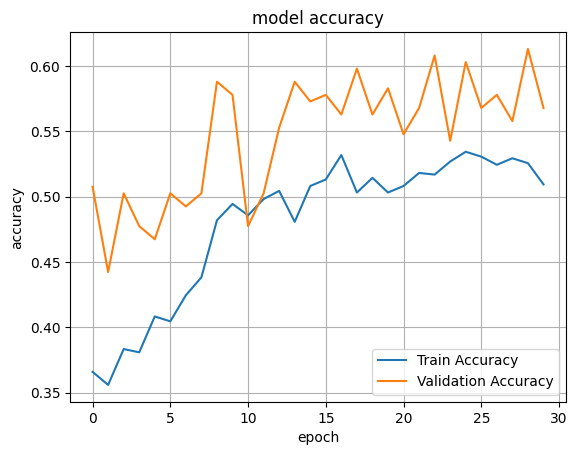

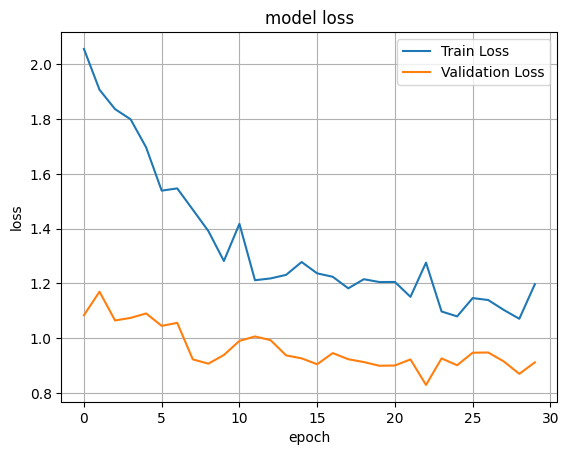

In [ ]:
import matplotlib.pyplot as plt
# Accuracy plot
plt.plot(history_age_subset_UTK.history['accuracy'], label = 'Train Accuracy')
plt.plot(history_age_subset_UTK.history['val_accuracy'], label = 'Validation Accuracy')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.grid(True)
plt.show()
# Loss plot
plt.plot(history_age_subset_UTK.history['loss'], label = 'Train Loss')
plt.plot(history_age_subset_UTK.history['val_loss'], label = 'Validation Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
import os

img_size = (98,98)
batch_size = 32
num_epochs = 30

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)

train_gen = datagen.flow_from_directory(
    'UTKFace_age_small',
    target_size = img_size,
    batch_size = batch_size,
    class_mode = 'categorical',
    subset = 'training'
)

val_gen = datagen.flow_from_directory(
   'UTKFace_age_small',
    target_size = img_size,
    batch_size = batch_size,
    class_mode = 'categorical',
    subset = 'validation'
)

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(98, 98, 3))
base_model.trainable = True

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
predictions = Dense(train_gen.num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

model.compile(
    optimizer= Adam(learning_rate=1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

labels = train_gen.classes

class_weights = compute_class_weight('balanced', classes=np.unique(labels), y=labels)
class_weights_dict = dict(enumerate(class_weights))

callbacks = [
    EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True),
    ModelCheckpoint('best_model_age_subset_UTK.h5', monitor='val_loss', save_best_only=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)
]

history_age_subset_finetune_UTK = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=num_epochs,
    callbacks=callbacks,
    class_weight=class_weights_dict
)

model.save('model_age_subset_finetune_UTK.h5')

Found 801 images belonging to 3 classes.
Found 199 images belonging to 3 classes.


/tmp/ipython-input-6-2293813468.py:39: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(98, 98, 3))


Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 771ms/step - accuracy: 0.3316 - loss: 1.8053

26/26 ━━━━━━━━━━━━━━━━━━━━ 71s 1s/step - accuracy: 0.3325 - loss: 1.8009 - val_accuracy: 0.2362 - val_loss: 1.8838 - learning_rate: 1.0000e-05
Epoch 2/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - accuracy: 0.3281 - loss: 1.4701

26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 146ms/step - accuracy: 0.3299 - loss: 1.4677 - val_accuracy: 0.2211 - val_loss: 1.7707 - learning_rate: 1.0000e-05
Epoch 3/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.3994 - loss: 1.2970

26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 142ms/step - accuracy: 0.4001 - loss: 1.2963 - val_accuracy: 0.2563 - val_loss: 1.7108 - learning_rate: 1.0000e-05
Epoch 4/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step - accuracy: 0.4080 - loss: 1.2190

26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 191ms/step - accuracy: 0.4086 - loss: 1.2168 - val_accuracy: 0.2814 - val_loss: 1.6937 - learning_rate: 1.0000e-05
Epoch 5/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.4792 - loss: 1.0252

26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 142ms/step - accuracy: 0.4788 - loss: 1.0251 - val_accuracy: 0.3116 - val_loss: 1.6203 - learning_rate: 1.0000e-05
Epoch 6/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.4785 - loss: 1.1836

26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 143ms/step - accuracy: 0.4784 - loss: 1.1788 - val_accuracy: 0.2814 - val_loss: 1.5640 - learning_rate: 1.0000e-05
Epoch 7/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 130ms/step - accuracy: 0.4427 - loss: 0.9425 - val_accuracy: 0.3065 - val_loss: 1.5734 - learning_rate: 1.0000e-05
Epoch 8/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.5792 - loss: 0.7643

26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 140ms/step - accuracy: 0.5780 - loss: 0.7665 - val_accuracy: 0.3065 - val_loss: 1.5498 - learning_rate: 1.0000e-05
Epoch 9/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 116ms/step - accuracy: 0.5551 - loss: 0.7789 - val_accuracy: 0.3216 - val_loss: 1.5522 - learning_rate: 1.0000e-05
Epoch 10/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - accuracy: 0.5333 - loss: 0.8688 

26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 154ms/step - accuracy: 0.5339 - loss: 0.8670 - val_accuracy: 0.3518 - val_loss: 1.5381 - learning_rate: 1.0000e-05
Epoch 11/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - accuracy: 0.5793 - loss: 0.7230

26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 145ms/step - accuracy: 0.5788 - loss: 0.7257 - val_accuracy: 0.3065 - val_loss: 1.5009 - learning_rate: 1.0000e-05
Epoch 12/30
25/26 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - accuracy: 0.5759 - loss: 0.7540

26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 143ms/step - accuracy: 0.5775 - loss: 0.7508 - val_accuracy: 0.3819 - val_loss: 1.4541 - learning_rate: 1.0000e-05
Epoch 13/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.6319 - loss: 0.6511

26/26 ━━━━━━━━━━━━━━━━━━━━ 5s 178ms/step - accuracy: 0.6305 - loss: 0.6533 - val_accuracy: 0.3568 - val_loss: 1.4215 - learning_rate: 1.0000e-05
Epoch 14/30
25/26 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - accuracy: 0.6179 - loss: 0.6457

26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 143ms/step - accuracy: 0.6173 - loss: 0.6513 - val_accuracy: 0.3869 - val_loss: 1.3906 - learning_rate: 1.0000e-05
Epoch 15/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.5838 - loss: 0.7536

26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 142ms/step - accuracy: 0.5855 - loss: 0.7503 - val_accuracy: 0.3769 - val_loss: 1.3826 - learning_rate: 1.0000e-05
Epoch 16/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 153ms/step - accuracy: 0.6424 - loss: 0.6679 - val_accuracy: 0.4070 - val_loss: 1.4372 - learning_rate: 1.0000e-05
Epoch 17/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 123ms/step - accuracy: 0.6772 - loss: 0.5904 - val_accuracy: 0.3920 - val_loss: 1.4101 - learning_rate: 1.0000e-05
Epoch 18/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - accuracy: 0.6243 - loss: 0.6929

26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 144ms/step - accuracy: 0.6255 - loss: 0.6916 - val_accuracy: 0.4020 - val_loss: 1.2692 - learning_rate: 1.0000e-05
Epoch 19/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 118ms/step - accuracy: 0.6623 - loss: 0.5980 - val_accuracy: 0.4422 - val_loss: 1.3160 - learning_rate: 1.0000e-05
Epoch 20/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 160ms/step - accuracy: 0.6721 - loss: 0.5988 - val_accuracy: 0.4322 - val_loss: 1.2901 - learning_rate: 1.0000e-05
Epoch 21/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 118ms/step - accuracy: 0.6340 - loss: 0.5756 - val_accuracy: 0.4171 - val_loss: 1.2705 - learning_rate: 1.0000e-05
Epoch 22/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 119ms/step - accuracy: 0.6708 - loss: 0.5841 - val_accuracy: 0.4121 - val_loss: 1.2970 - learning_rate: 5.0000e-06
Epoch 23/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 146ms/step - accuracy: 0.6530 - loss: 0.6409 - val_accuracy: 0.4322 - val_loss: 1.3162 - learning_rate: 5.0000e-06
Epoch 24/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - accuracy: 0.681

26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 165ms/step - accuracy: 0.6816 - loss: 0.5895 - val_accuracy: 0.4523 - val_loss: 1.2571 - learning_rate: 5.0000e-06
Epoch 25/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 118ms/step - accuracy: 0.7101 - loss: 0.5913 - val_accuracy: 0.4271 - val_loss: 1.2865 - learning_rate: 5.0000e-06
Epoch 26/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - accuracy: 0.6666 - loss: 0.5716

26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 144ms/step - accuracy: 0.6672 - loss: 0.5709 - val_accuracy: 0.4070 - val_loss: 1.2355 - learning_rate: 5.0000e-06
Epoch 27/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 163ms/step - accuracy: 0.7088 - loss: 0.5644 - val_accuracy: 0.4221 - val_loss: 1.3088 - learning_rate: 5.0000e-06
Epoch 28/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - accuracy: 0.7352 - loss: 0.5472

26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 143ms/step - accuracy: 0.7351 - loss: 0.5451 - val_accuracy: 0.4673 - val_loss: 1.1618 - learning_rate: 5.0000e-06
Epoch 29/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 116ms/step - accuracy: 0.7006 - loss: 0.5030 - val_accuracy: 0.4422 - val_loss: 1.2401 - learning_rate: 5.0000e-06
Epoch 30/30
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 147ms/step - accuracy: 0.7384 - loss: 0.5333 - val_accuracy: 0.4121 - val_loss: 1.2812 - learning_rate: 5.0000e-06


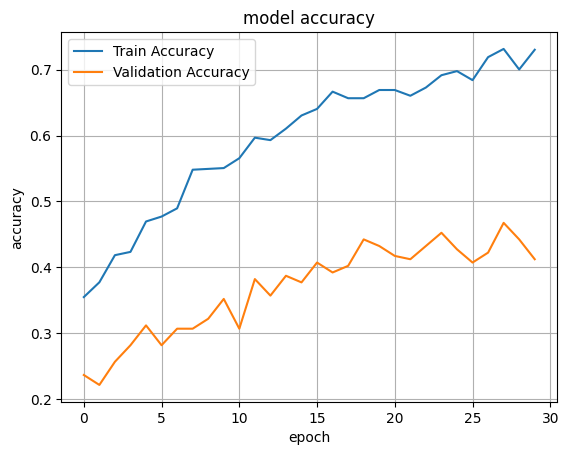

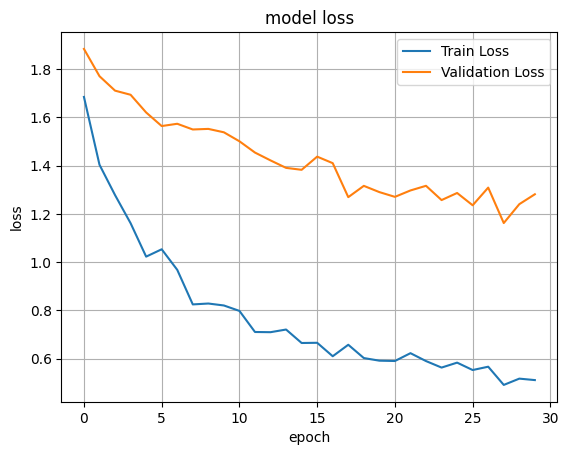

In [ ]:
import matplotlib.pyplot as plt
# Accuracy plot
plt.plot(history_age_subset_finetune_UTK.history['accuracy'], label = 'Train Accuracy')
plt.plot(history_age_subset_finetune_UTK.history['val_accuracy'], label = 'Validation Accuracy')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.grid(True)
plt.show()
# Loss plot
plt.plot(history_age_subset_finetune_UTK.history['loss'], label = 'Train Loss')
plt.plot(history_age_subset_UTK.history['val_loss'], label = 'Validation Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
import os

img_size = (98,98)
batch_size = 32
num_epochs = 30

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    rotation_range = 15,
    width_shift_range = 0.1,
    height_shift_range = 0.1
)

train_gen = datagen.flow_from_directory(
    'UTKFace_age_small',
    target_size = img_size,
    batch_size = batch_size,
    class_mode = 'categorical',
    subset = 'training'
)

val_gen = datagen.flow_from_directory(
   'UTKFace_age_small',
    target_size = img_size,
    batch_size = batch_size,
    class_mode = 'categorical',
    subset = 'validation'
)

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(98, 98, 3))
for layers in base_model.layers[:-30]:
  layers.trainable = False
for layers in base_model.layers[:-30]:
  layers.trainable = True

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.6)(x)
predictions = Dense(train_gen.num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

model.compile(
    optimizer= Adam(learning_rate=1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

labels = train_gen.classes

class_weights = compute_class_weight('balanced', classes=np.unique(labels), y=labels)
class_weights_dict = dict(enumerate(class_weights))

callbacks = [
    EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True),
    ModelCheckpoint('best_model_age_subset2_UTK.h5', monitor='val_loss', save_best_only=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)
]

history_age_subset_finetune2_UTK = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=num_epochs,
    callbacks=callbacks,
    class_weight=class_weights_dict
)

model.save('model_age_subset2_finetune_UTK.h5')

Found 1602 images belonging to 3 classes.
Found 398 images belonging to 3 classes.


/tmp/ipython-input-7-1779739762.py:42: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(98, 98, 3))
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.2328 - loss: 2.0224

51/51 ━━━━━━━━━━━━━━━━━━━━ 116s 2s/step - accuracy: 0.2330 - loss: 2.0194 - val_accuracy: 0.1633 - val_loss: 2.2037 - learning_rate: 1.0000e-05
Epoch 2/30
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.2746 - loss: 1.5973

51/51 ━━━━━━━━━━━━━━━━━━━━ 76s 1s/step - accuracy: 0.2752 - loss: 1.5961 - val_accuracy: 0.1910 - val_loss: 2.1210 - learning_rate: 1.0000e-05
Epoch 3/30
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.3459 - loss: 1.3680

51/51 ━━━━━━━━━━━━━━━━━━━━ 74s 1s/step - accuracy: 0.3462 - loss: 1.3659 - val_accuracy: 0.2035 - val_loss: 2.0527 - learning_rate: 1.0000e-05
Epoch 4/30
51/51 ━━━━━━━━━━━━━━━━━━━━ 73s 1s/step - accuracy: 0.3914 - loss: 1.2146 - val_accuracy: 0.2362 - val_loss: 2.1253 - learning_rate: 1.0000e-05
Epoch 5/30
51/51 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.4531 - loss: 1.0137 - val_accuracy: 0.2236 - val_loss: 2.0723 - learning_rate: 1.0000e-05
Epoch 6/30
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5095 - loss: 0.9553

51/51 ━━━━━━━━━━━━━━━━━━━━ 74s 1s/step - accuracy: 0.5095 - loss: 0.9557 - val_accuracy: 0.2362 - val_loss: 1.9756 - learning_rate: 1.0000e-05
Epoch 7/30
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5422 - loss: 0.9142

51/51 ━━━━━━━━━━━━━━━━━━━━ 78s 2s/step - accuracy: 0.5420 - loss: 0.9143 - val_accuracy: 0.2714 - val_loss: 1.8145 - learning_rate: 1.0000e-05
Epoch 8/30
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5484 - loss: 0.8953

51/51 ━━━━━━━━━━━━━━━━━━━━ 75s 1s/step - accuracy: 0.5484 - loss: 0.8947 - val_accuracy: 0.2789 - val_loss: 1.7859 - learning_rate: 1.0000e-05
Epoch 9/30
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5347 - loss: 0.8569

51/51 ━━━━━━━━━━━━━━━━━━━━ 74s 1s/step - accuracy: 0.5352 - loss: 0.8561 - val_accuracy: 0.3065 - val_loss: 1.7014 - learning_rate: 1.0000e-05
Epoch 10/30
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5849 - loss: 0.7870

51/51 ━━━━━━━━━━━━━━━━━━━━ 73s 1s/step - accuracy: 0.5852 - loss: 0.7868 - val_accuracy: 0.3065 - val_loss: 1.5913 - learning_rate: 1.0000e-05
Epoch 11/30
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6209 - loss: 0.7462

51/51 ━━━━━━━━━━━━━━━━━━━━ 74s 1s/step - accuracy: 0.6208 - loss: 0.7468 - val_accuracy: 0.3141 - val_loss: 1.4852 - learning_rate: 1.0000e-05
Epoch 12/30
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6208 - loss: 0.7660

51/51 ━━━━━━━━━━━━━━━━━━━━ 74s 1s/step - accuracy: 0.6210 - loss: 0.7661 - val_accuracy: 0.3367 - val_loss: 1.4474 - learning_rate: 1.0000e-05
Epoch 13/30
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6011 - loss: 0.7603

51/51 ━━━━━━━━━━━━━━━━━━━━ 74s 1s/step - accuracy: 0.6017 - loss: 0.7596 - val_accuracy: 0.3668 - val_loss: 1.3270 - learning_rate: 1.0000e-05
Epoch 14/30
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6456 - loss: 0.6741

51/51 ━━━━━━━━━━━━━━━━━━━━ 74s 1s/step - accuracy: 0.6454 - loss: 0.6745 - val_accuracy: 0.4020 - val_loss: 1.2612 - learning_rate: 1.0000e-05
Epoch 15/30
51/51 ━━━━━━━━━━━━━━━━━━━━ 73s 1s/step - accuracy: 0.6634 - loss: 0.6342 - val_accuracy: 0.4070 - val_loss: 1.3046 - learning_rate: 1.0000e-05
Epoch 16/30
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6389 - loss: 0.7079

51/51 ━━━━━━━━━━━━━━━━━━━━ 74s 1s/step - accuracy: 0.6392 - loss: 0.7076 - val_accuracy: 0.4849 - val_loss: 1.1579 - learning_rate: 1.0000e-05
Epoch 17/30
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6819 - loss: 0.6258

51/51 ━━━━━━━━━━━━━━━━━━━━ 73s 1s/step - accuracy: 0.6817 - loss: 0.6260 - val_accuracy: 0.5377 - val_loss: 1.0373 - learning_rate: 1.0000e-05
Epoch 18/30
51/51 ━━━━━━━━━━━━━━━━━━━━ 74s 1s/step - accuracy: 0.6921 - loss: 0.6014 - val_accuracy: 0.5377 - val_loss: 1.0747 - learning_rate: 1.0000e-05
Epoch 19/30
51/51 ━━━━━━━━━━━━━━━━━━━━ 74s 1s/step - accuracy: 0.6961 - loss: 0.6183 - val_accuracy: 0.5302 - val_loss: 1.0458 - learning_rate: 1.0000e-05
Epoch 20/30
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6944 - loss: 0.5994

51/51 ━━━━━━━━━━━━━━━━━━━━ 76s 1s/step - accuracy: 0.6946 - loss: 0.5991 - val_accuracy: 0.5377 - val_loss: 1.0068 - learning_rate: 1.0000e-05
Epoch 21/30
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7211 - loss: 0.5473

51/51 ━━━━━━━━━━━━━━━━━━━━ 74s 1s/step - accuracy: 0.7210 - loss: 0.5477 - val_accuracy: 0.5879 - val_loss: 0.9148 - learning_rate: 1.0000e-05
Epoch 22/30
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7215 - loss: 0.5639

51/51 ━━━━━━━━━━━━━━━━━━━━ 76s 1s/step - accuracy: 0.7215 - loss: 0.5640 - val_accuracy: 0.6005 - val_loss: 0.9146 - learning_rate: 1.0000e-05
Epoch 23/30
51/51 ━━━━━━━━━━━━━━━━━━━━ 79s 1s/step - accuracy: 0.7420 - loss: 0.5083 - val_accuracy: 0.5879 - val_loss: 0.9358 - learning_rate: 1.0000e-05
Epoch 24/30
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7076 - loss: 0.6459

51/51 ━━━━━━━━━━━━━━━━━━━━ 73s 1s/step - accuracy: 0.7076 - loss: 0.6450 - val_accuracy: 0.6106 - val_loss: 0.9098 - learning_rate: 1.0000e-05
Epoch 25/30
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7270 - loss: 0.5366

51/51 ━━━━━━━━━━━━━━━━━━━━ 73s 1s/step - accuracy: 0.7272 - loss: 0.5361 - val_accuracy: 0.6633 - val_loss: 0.8201 - learning_rate: 1.0000e-05
Epoch 26/30
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7606 - loss: 0.5130

51/51 ━━━━━━━━━━━━━━━━━━━━ 75s 1s/step - accuracy: 0.7600 - loss: 0.5140 - val_accuracy: 0.6633 - val_loss: 0.8102 - learning_rate: 1.0000e-05
Epoch 27/30
51/51 ━━━━━━━━━━━━━━━━━━━━ 72s 1s/step - accuracy: 0.7314 - loss: 0.5025 - val_accuracy: 0.6508 - val_loss: 0.8614 - learning_rate: 1.0000e-05
Epoch 28/30
51/51 ━━━━━━━━━━━━━━━━━━━━ 73s 1s/step - accuracy: 0.7208 - loss: 0.5682 - val_accuracy: 0.6734 - val_loss: 0.8202 - learning_rate: 1.0000e-05
Epoch 29/30
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7644 - loss: 0.4948

51/51 ━━━━━━━━━━━━━━━━━━━━ 76s 1s/step - accuracy: 0.7642 - loss: 0.4950 - val_accuracy: 0.6633 - val_loss: 0.7651 - learning_rate: 1.0000e-05
Epoch 30/30
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7518 - loss: 0.5174

51/51 ━━━━━━━━━━━━━━━━━━━━ 75s 1s/step - accuracy: 0.7519 - loss: 0.5167 - val_accuracy: 0.7337 - val_loss: 0.7345 - learning_rate: 1.0000e-05


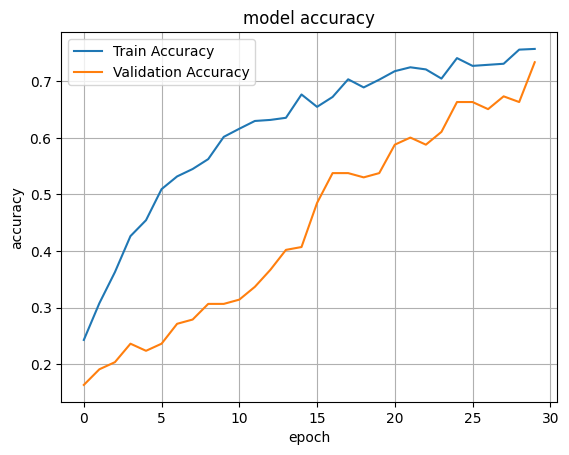

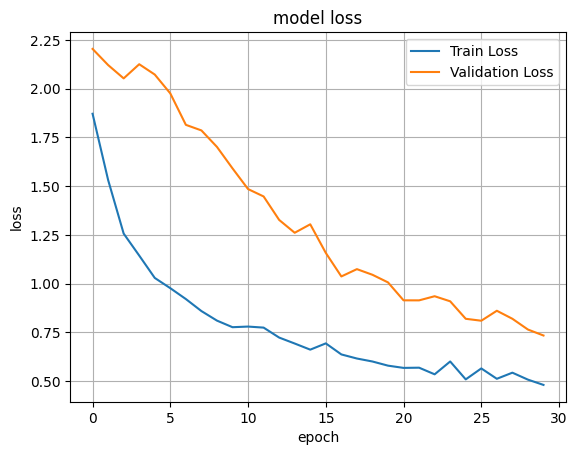

In [ ]:
import matplotlib.pyplot as plt
# Accuracy plot
plt.plot(history_age_subset_finetune2_UTK.history['accuracy'], label = 'Train Accuracy')
plt.plot(history_age_subset_finetune2_UTK.history['val_accuracy'], label = 'Validation Accuracy')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.grid(True)
plt.show()
# Loss plot
plt.plot(history_age_subset_finetune2_UTK.history['loss'], label = 'Train Loss')
plt.plot(history_age_subset_finetune2_UTK.history['val_loss'], label = 'Validation Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

!cp model_age_subset2_finetune_UTK.h5 /content/drive/MyDrive/

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import files
files.download('model_age_subset2_finetune_UTK.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from tensorflow.keras.models import load_model

model = load_model('/content/drive/MyDrive/model_age_subset2_finetune_UTK.h5')

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving imag_varsta.jpg to imag_varsta (1).jpg


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

img_path = 'imag_varsta.jpg'
img = image.load_img(img_path, target_size=(98, 98))
img_array = image.img_to_array(img)
img_array = img_array / 255.0
img_array = np.expand_dims(img_array, axis=0)

preds = model.predict(img_array)

clasa_idx = np.argmax(preds)
clase = ['child', 'adult', 'senior']

print("Predictie (varsta): ",clase[clasa_idx])
print("Probabilitate: ", preds)

#print("Clasa prezisa:", np.argmax(preds))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Predictie (varsta):  senior
Probabilitate:  [[0.06661335 0.00697123 0.9264154 ]]


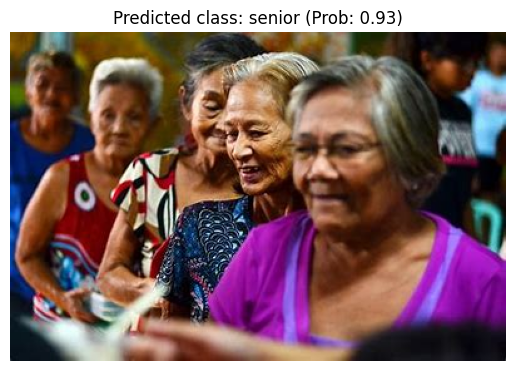

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(image.load_img(img_path))
plt.title(f"Predicted class: {clase[clasa_idx]} (Prob: {preds[0][clasa_idx]:.2f})")
plt.axis('off')
plt.show()

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving imag_varsta2.webp to imag_varsta2.webp


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

img_path = 'imag_varsta2.webp'
img = image.load_img(img_path, target_size=(98, 98))
img_array = image.img_to_array(img)
img_array = img_array / 255.0
img_array = np.expand_dims(img_array, axis=0)

preds = model.predict(img_array)

clasa_idx = np.argmax(preds)
clase = ['child', 'adult', 'senior']

print("Predictie (varsta): ",clase[clasa_idx])
print("Probabilitate: ", preds)

#print("Clasa prezisa:", np.argmax(preds))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Predictie (varsta):  child
Probabilitate:  [[0.81488603 0.01534738 0.16976663]]


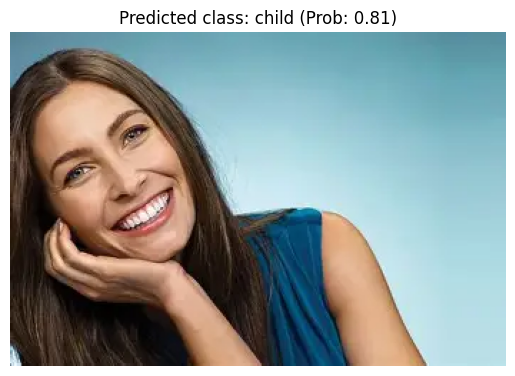

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(image.load_img(img_path))
plt.title(f"Predicted class: {clase[clasa_idx]} (Prob: {preds[0][clasa_idx]:.2f})")
plt.axis('off')
plt.show()

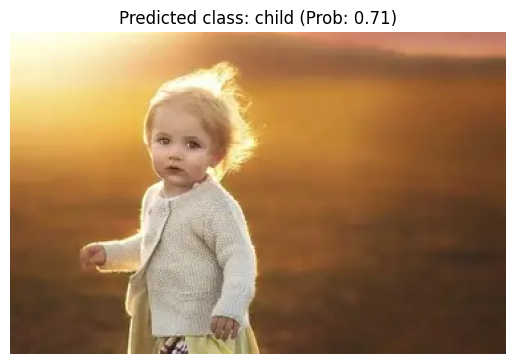

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(image.load_img(img_path))
plt.title(f"Predicted class: {clase[clasa_idx]} (Prob: {preds[0][clasa_idx]:.2f})")
plt.axis('off')
plt.show()

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving emotion.zip to emotion.zip


In [ ]:
!unzip emotion.zip -d emotion

Archive:  emotion.zip
  inflating: emotion/fer2013.csv     


In [ ]:
import pandas as pd
import numpy as np
import os
from PIL import Image

df = pd.read_csv('emotion/fer2013.csv')
emotion_labels = {0: 'Angry', 1: 'Disgust', 2: 'Fear', 3: 'Happy', 4: 'Sad', 5: 'Surprise', 6: 'Neutral'}

base_dir = '/content/emotion/fer2013_images'
for usage in df['Usage'].unique():
  for label in emotion_labels.values():
    os.makedirs(f'{base_dir}/{usage}/{label}', exist_ok=True)

for i, row in df.iterrows():
  pixels = np.fromstring(row['pixels'], sep=' ', dtype=int).reshape(48, 48)
  emotion = emotion_labels[row['emotion']]
  usage = row['Usage']
  img = Image.fromarray(pixels.astype(np.uint8))
  img.save(f'{base_dir}/{usage}/{emotion}/{i}.png')


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255)
train_it = datagen.flow_from_directory('/content/emotion/fer2013_images/Training',
                                       target_size=(48, 48),
                                       color_mode='grayscale',
                                       batch_size=32,
                                       class_mode='categorical')

val_it = datagen.flow_from_directory('/content/emotion/fer2013_images/PublicTest',
                                       target_size=(48, 48),
                                       color_mode='grayscale',
                                       batch_size=32,
                                       class_mode='categorical')

Found 28709 images belonging to 7 classes.
Found 3589 images belonging to 7 classes.


In [ ]:
from tensorflow.keras import layers, models

num_train = 3000
num_val = 500
batch_size = 32

steps_per_epoch = num_train
validation_steps = num_val

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(7, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_emotion = model.fit(
    train_it,
    steps_per_epoch=steps_per_epoch,
    epochs=30,
    validation_data=val_it,
    validation_steps=validation_steps
)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
 898/3000 ━━━━━━━━━━━━━━━━━━━━ 4:31 129ms/step - accuracy: 0.2596 - loss: 1.8014

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


3000/3000 ━━━━━━━━━━━━━━━━━━━━ 127s 41ms/step - accuracy: 0.2885 - loss: 1.7506 - val_accuracy: 0.4040 - val_loss: 1.5603
Epoch 2/30
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 139s 40ms/step - accuracy: 0.3808 - loss: 1.5676 - val_accuracy: 0.4547 - val_loss: 1.4618
Epoch 3/30
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 117s 39ms/step - accuracy: 0.4129 - loss: 1.4928 - val_accuracy: 0.4673 - val_loss: 1.3746
Epoch 4/30
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 143s 39ms/step - accuracy: 0.4424 - loss: 1.4380 - val_accuracy: 0.4703 - val_loss: 1.3743
Epoch 5/30
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 142s 40ms/step - accuracy: 0.4561 - loss: 1.3944 - val_accuracy: 0.4948 - val_loss: 1.3131
Epoch 6/30
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 142s 40ms/step - accuracy: 0.4737 - loss: 1.3547 - val_accuracy: 0.5024 - val_loss: 1.3185
Epoch 7/30
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 142s 40ms/step - accuracy: 0.4919 - loss: 1.3136 - val_accuracy: 0.5065 - val_loss: 1.2836
Epoch 8/30
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 140s 39ms/step - accuracy: 0.5090 - lo

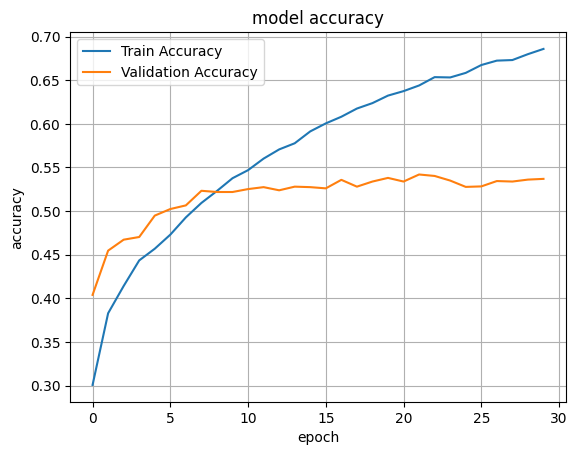

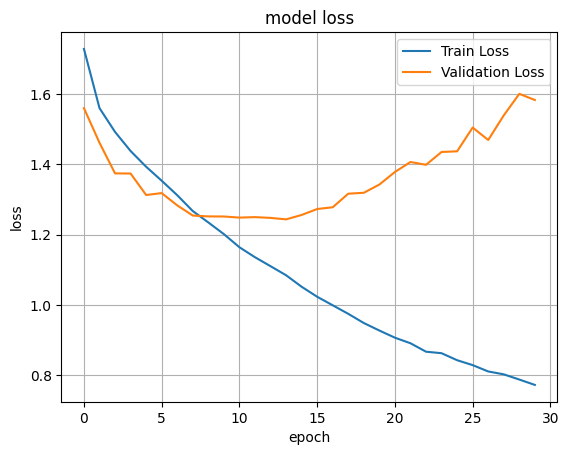

In [ ]:
import matplotlib.pyplot as plt
# Accuracy plot
plt.plot(history_emotion.history['accuracy'], label = 'Train Accuracy')
plt.plot(history_emotion.history['val_accuracy'], label = 'Validation Accuracy')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.grid(True)
plt.show()
# Loss plot
plt.plot(history_emotion.history['loss'], label = 'Train Loss')
plt.plot(history_emotion.history['val_loss'], label = 'Validation Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255,
                             rotation_range=10,
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             zoom_range=0.1,
                             horizontal_flip=True,
                            )
train_it = datagen.flow_from_directory('/content/emotion/fer2013_images/Training',
                                       target_size=(48, 48),
                                       color_mode='grayscale',
                                       batch_size=32,
                                       class_mode='categorical')
val_datagen = ImageDataGenerator(rescale=1./255)
val_it = datagen.flow_from_directory('/content/emotion/fer2013_images/PublicTest',
                                       target_size=(48, 48),
                                       color_mode='grayscale',
                                       batch_size=32,
                                       class_mode='categorical')

Found 28709 images belonging to 7 classes.
Found 3589 images belonging to 7 classes.


In [ ]:
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

num_train = 3000
num_val = 500
batch_size = 32

steps_per_epoch = num_train
validation_steps = num_val

model = models.Sequential([
    layers.Input(shape=(48, 48, 1)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.6),
    layers.Dense(7, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)

history_emotion2 = model.fit(
    train_it,
    steps_per_epoch=steps_per_epoch,
    epochs=30,
    validation_data=val_it,
    validation_steps=validation_steps
)

Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 898/3000 ━━━━━━━━━━━━━━━━━━━━ 4:58 142ms/step - accuracy: 0.2227 - loss: 1.8429

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


3000/3000 ━━━━━━━━━━━━━━━━━━━━ 136s 44ms/step - accuracy: 0.2409 - loss: 1.8150 - val_accuracy: 0.2995 - val_loss: 1.7136
Epoch 2/30
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 142s 44ms/step - accuracy: 0.2903 - loss: 1.7357 - val_accuracy: 0.3227 - val_loss: 1.6728
Epoch 3/30
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 132s 44ms/step - accuracy: 0.3170 - loss: 1.6818 - val_accuracy: 0.3753 - val_loss: 1.5805
Epoch 4/30
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 132s 44ms/step - accuracy: 0.3443 - loss: 1.6361 - val_accuracy: 0.4076 - val_loss: 1.5586
Epoch 5/30
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 132s 44ms/step - accuracy: 0.3651 - loss: 1.6010 - val_accuracy: 0.4296 - val_loss: 1.5124
Epoch 6/30
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 133s 44ms/step - accuracy: 0.3776 - loss: 1.5748 - val_accuracy: 0.4199 - val_loss: 1.4819
Epoch 7/30
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 133s 44ms/step - accuracy: 0.3880 - loss: 1.5504 - val_accuracy: 0.4441 - val_loss: 1.4600
Epoch 8/30
3000/3000 ━━━━━━━━━━━━━━━━━━━━ 133s 44ms/step - accuracy: 0.3979 - lo

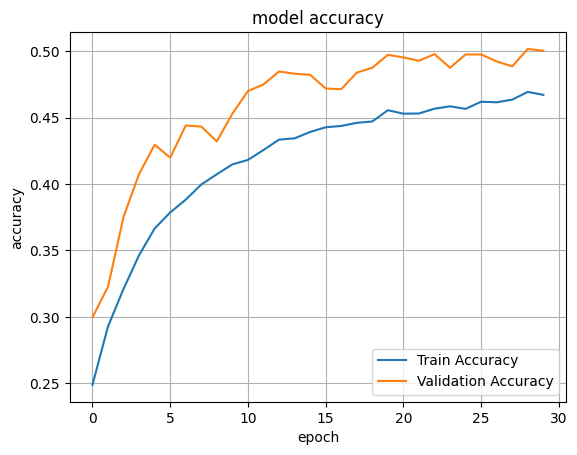

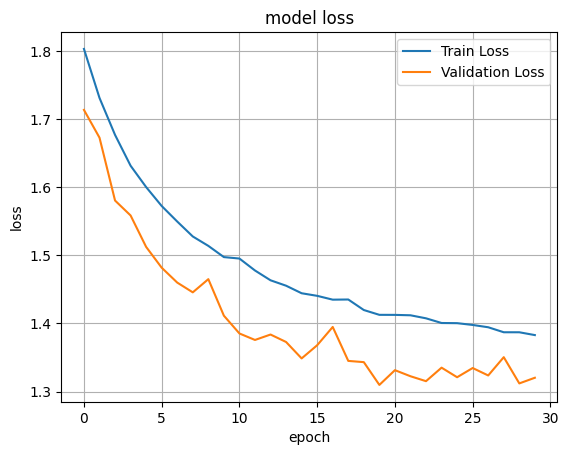

In [ ]:
import matplotlib.pyplot as plt
# Accuracy plot
plt.plot(history_emotion2.history['accuracy'], label = 'Train Accuracy')
plt.plot(history_emotion2.history['val_accuracy'], label = 'Validation Accuracy')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.grid(True)
plt.show()
# Loss plot
plt.plot(history_emotion2.history['loss'], label = 'Train Loss')
plt.plot(history_emotion2.history['val_loss'], label = 'Validation Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
model.save('emotion_model.h5')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!cp emotion_model.h5 /content/drive/MyDrive/emotion_model.h5

In [ ]:
from google.colab import files
files.download('emotion_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving emotie1.webp to emotie1.webp


In [2]:
from tensorflow.keras.models import load_model

model = load_model('/content/drive/MyDrive/emotion_model.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step
Predictie (emotie):  Happy
Probabilitate:  [[0.12880163 0.01522061 0.15460543 0.3298749  0.1324935  0.13516213
  0.1038418 ]]


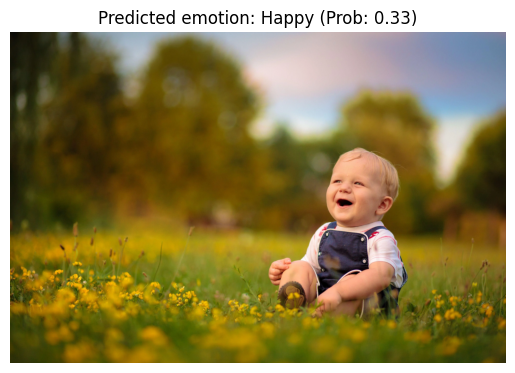

In [4]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

img_path = 'emotie1.webp'
img = image.load_img(img_path, target_size=(48, 48), color_mode='grayscale')
img_array = image.img_to_array(img)
img_array = img_array / 255.0
img_array = np.expand_dims(img_array, axis=0)

preds = model.predict(img_array)

emotion_preds = preds

clase = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

clasa_idx = np.argmax(emotion_preds)

print("Predictie (emotie): ",clase[clasa_idx])
print("Probabilitate: ", emotion_preds)

plt.imshow(image.load_img(img_path))
plt.title(f"Predicted emotion: {clase[clasa_idx]} (Prob: {emotion_preds[0][clasa_idx]:.2f})")
plt.axis('off')
plt.show()

In [63]:
from google.colab import files
uploaded = files.upload()

Saving adult_doctor3.webp to adult_doctor3 (1).webp


In [64]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

img_path = 'adult_doctor3.webp'
img = image.load_img(img_path, target_size=(48, 48), color_mode='grayscale')
img_array = image.img_to_array(img)
img_array = img_array / 255.0
img_array = np.expand_dims(img_array, axis=0)

preds = model.predict(img_array)

emotion_preds = preds

clase = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

clasa_idx = np.argmax(emotion_preds)

print("Predictie (emotie): ",clase[clasa_idx])
print("Probabilitate: ", emotion_preds)

plt.imshow(image.load_img(img_path))
plt.title(f"Predicted emotion: {clase[clasa_idx]} (Prob: {emotion_preds[0][clasa_idx]:.2f})")
plt.axis('off')
plt.show()

ValueError: Input 0 of layer "functional_25" is incompatible with the layer: expected shape=(None, 98, 98, 3), found shape=(1, 48, 48)

In [1]:
from tensorflow.keras.models import load_model

age_model = load_model('/content/drive/MyDrive/model_age_subset2_finetune_UTK.h5')
emotion_model = load_model('/content/drive/MyDrive/emotion_model.h5')
proffesional_model = load_model('/content/drive/MyDrive/finetune_model.h5')


In [71]:
from tensorflow.keras.models import load_model
model =

In [2]:
from google.colab import files
uploaded = files.upload()

Saving adult_doctor.webp to adult_doctor.webp
Saving adult_doctor1.webp to adult_doctor1.webp
Saving adult_doctor2.webp to adult_doctor2.webp
Saving adult_doctor3.webp to adult_doctor3.webp
Saving adult_doctor4.jpg to adult_doctor4.jpg
Saving adult_doctor5.jpg to adult_doctor5.jpg
Saving adult_doctor6.jpg to adult_doctor6.jpg
Saving adult_doctor7.jpg to adult_doctor7.jpg
Saving adult_fire.webp to adult_fire.webp
Saving adult_fire1.webp to adult_fire1.webp
Saving adult_fire2.webp to adult_fire2.webp
Saving adult_fire3.jpg to adult_fire3.jpg
Saving adult_fire4.jpg to adult_fire4.jpg
Saving adult_fire5.jpg to adult_fire5.jpg
Saving adult_fire6.jpg to adult_fire6.jpg
Saving adult_fire7.jpg to adult_fire7.jpg
Saving age1.webp to age1.webp


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


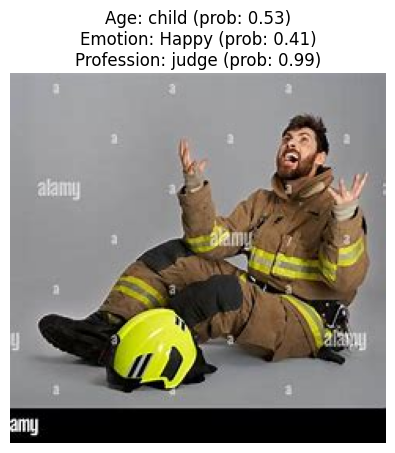

In [18]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

img_path = 'adult_fire3.jpg'

#img= image.load_img(img_path, target_size=(128, 128), color_mode='grayscale')
img_age = image.load_img(img_path, target_size=(98, 98),color_mode='rgb')
img_age = image.img_to_array(img_age)/ 255.0
img_age = np.expand_dims(img_age, axis=0)

#preds = model.predict(img_array)
img_emotion = image.load_img(img_path, target_size=(48, 48), color_mode='grayscale')
img_emotion = image.img_to_array(img_emotion)/ 255.0
img_emotion = np.expand_dims(img_emotion, axis=0)

img_proffesional = image.load_img(img_path, target_size=(128, 128), color_mode='rgb')
img_proffesional = image.img_to_array(img_proffesional)/ 255.0
img_proffesional = np.expand_dims(img_proffesional, axis=0)

#img_array = image.img_to_array(img)
#img_array = img_array / 255.0
#img_array = np.expand_dims(img_array, axis=0)

#preds = model.predict(img_array)

#age_pred = preds[0]
#prof_pred = preds[1]
#emotion_pred = preds[2]
age_pred = age_model.predict(img_age)
prof_pred = proffesional_model.predict(img_proffesional)
emotion_pred = emotion_model.predict(img_emotion)

age_classes = ['child', 'adult', 'senior']
prof_classes = ['waiter', 'police', 'pilot', 'mechanic', 'judge', 'firefighter', 'farmer', 'engineer', 'doctor', 'chef']
emotion_classes = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

age_idx = np.argmax(age_pred)
prof_idx = np.argmax(prof_pred)
emotion_idx = np.argmax(emotion_pred)

plt.imshow(image.load_img(img_path))
plt.axis('off')
plt.title(f"Age: {age_classes[age_idx]} (prob: {age_pred[0][age_idx]:.2f})\n"
          f"Emotion: {emotion_classes[emotion_idx]} (prob: {emotion_pred[0][emotion_idx]:.2f})\n"
          f"Profession: {prof_classes[prof_idx]} (prob: {prof_pred[0][prof_idx]:.2f})")
#plt.title(f"Emotion: {emotion_classes[emotion_idx]} (prob: {emotion_pred[0][emotion_idx]:.2f}), profession: {prof_classes[prof_idx]} (prob: {prof_pred[0][prof_idx]:.2f}), age: {age_classes[age_idx]} (prob: {age_pred[0][age_idx]:.2f}) ")
plt.show()

In [9]:
print(age_model.input_shape)
print(emotion_model.input_shape)
print(proffesional_model.input_shape)


(None, 98, 98, 3)
(None, 48, 48, 1)
(None, 128, 128, 3)
